# **Customer Churn Prediction using Trained Model**
We will use a telecommunications dataset for predicting customer churn. This is a historical customer dataset where each row represents one customer. The data is relatively easy to understand, and you may uncover insights you can use immediately. Typically it is less expensive to keep customers than acquire new ones, so the focus of this analysis is to predict the customers who will stay with the company. 


This data set provides information to help you predict what behavior will help you to retain customers. You can analyze all relevant customer data and develop focused customer retention programs.



The dataset includes information about:

- Customers who left within the last month – the column is called Churn
- Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies
- Customer account information – how long they had been a customer, contract, payment method, paperless billing, monthly charges, and total charges
- Demographic info about customers – gender, age range, and if they have partners and dependents

### Objectives:

* Cleaning the Data.
* Feature Analysis.
* Label Encoding.
* Feature Selection.
* Hypothesis Generation and Testing.
* Analyzing the Selected Features.
* Comparing Classification Models.
* Model Evaluation.
* Making Predictions.

### Table of Contents
1. [Loading and Initial Data Preprocessing](#loading-and-initial-data-preprocessing)
2. [Feature Analysis](#feature-analysis)
3. [TotalCharges and Tenure Analysis](#totalcharges-and-tenure-analysis)
4. [Label Encoding for Categorical Features](#label-encoding-for-categorical-features)
5. [Feature Selection](#feature-selection)
6. [Feature-Specific Accuracy Calculation using Logistic Regression](#Feature_Specific_Accuracy_Calculation_using_Logistic_Regression)
7. [Hypothesis Testing using Chi-Square Test](#hypothesis-testing-using-chi-square-test)
8. [Proportion of Churned Customers by Categorical Variable](#proportion-of-churned-customers-by-categorical-variable)
9. [Visualizing Churn Analysis](#visualizing-churn-analysis)
10. [Comparing Classification Models](#comparing-classification-models)
11. [Logistic Regression Model Evaluation and Confusion Matrix](#logistic-regression-model-evaluation-and-confusion-matrix)
12. [Making Predictions with a Trained Model](#making-predictions-with-a-trained-model)


### Importing Libraries and Modules
Importing necessary libraries and modules required for data analysis, visualization, preprocessing, and machine learning..

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split, cross_val_predict, cross_val_score, KFold, GridSearchCV, learning_curve
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from scipy.stats import chi2_contingency
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import jaccard_score
from sklearn.feature_selection import GenericUnivariateSelect, chi2, f_classif 
from mlxtend.feature_selection import ExhaustiveFeatureSelector
from sklearn.linear_model import Perceptron
from sklearn.feature_selection import RFE

from sklearn.preprocessing import StandardScaler, Normalizer, MinMaxScaler
from sklearn.preprocessing import MaxAbsScaler

from sklearn.decomposition import PCA, FastICA
from sklearn.utils.class_weight import compute_sample_weight
import warnings
warnings.filterwarnings('ignore')


### Loading and Initial Data Preprocessing
Loading the dataset and performing initial preprocessing steps such as renaming columns, setting display options, dropping irrelevant columns, and handling missing data and categorical values.

In [2]:
df = pd.read_csv('Telco_Customer_Churn.csv')
df.columns = df.columns.str[0].str.upper() + df.columns.str[1:]
pd.set_option('display.max_columns', 21)
df.drop(columns='CustomerID', inplace=True)
df['MultipleLines'] = df['MultipleLines'].replace('No phone service', 'No')
df[['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']] = df[['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']].replace('No internet service', 'No')
df.head()

,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
df.shape

(7043, 20)

In [4]:
df.describe()

,SeniorCitizen,Tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   Tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [6]:
df.isnull().sum()

Gender              0
SeniorCitizen       0
Partner             0
Dependents          0
Tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

### Feature Analysis
Visualizing features in the dataset to gain insights into their distribution and patterns.

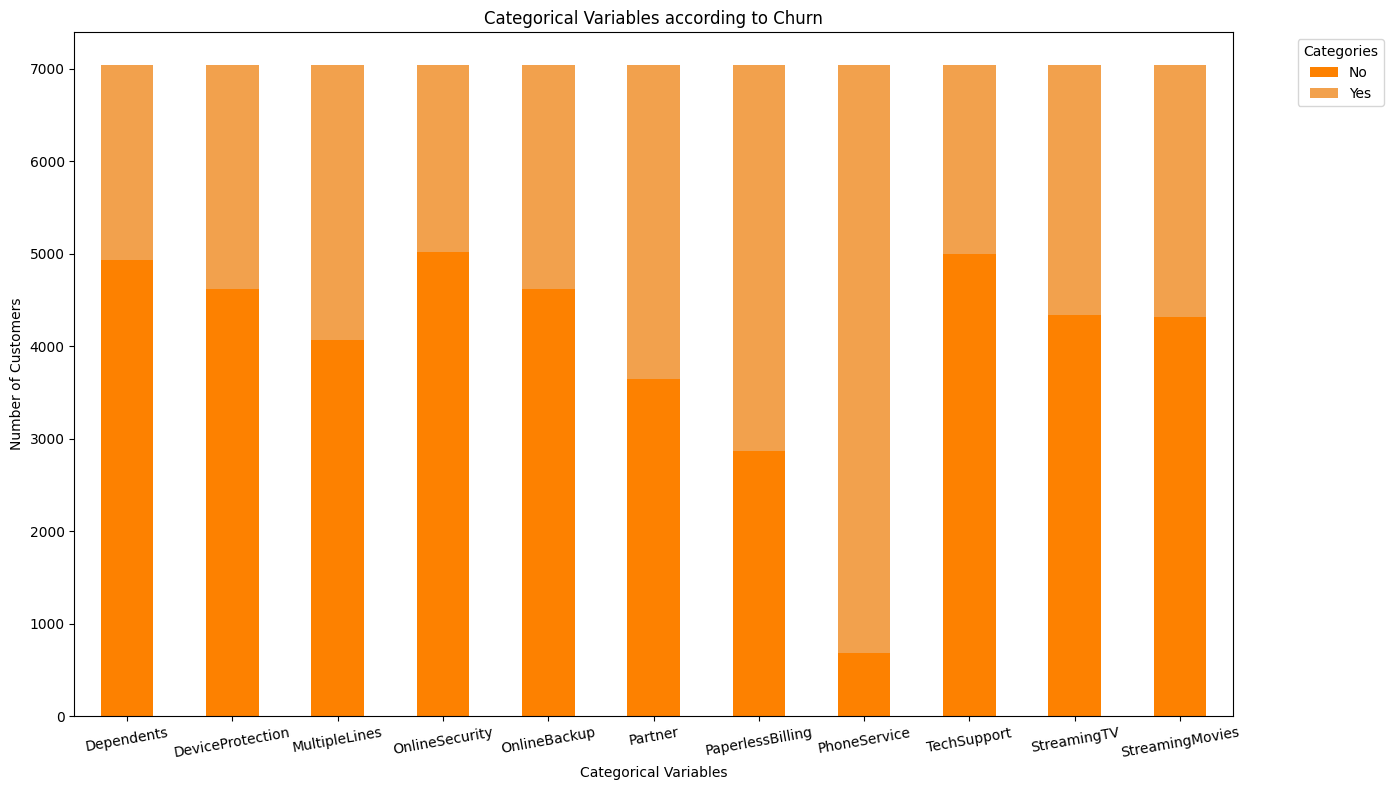

In [7]:
def plot_binary_categorical(df, binary_categorical, custom_colors=None, title=None, labels=None):
    # Initialize a figure and axis
    plt.figure(figsize=(14, 8))
    ax = plt.subplot(111)

    if custom_colors is None:
        custom_colors = ['#fd8100', '#f2a14d']

    # Plotting grouped bar chart
    plot_data = df[binary_categorical].apply(pd.Series.value_counts).T
    plot_data = plot_data.reindex(sorted(plot_data.columns), axis=1)

    plot = plot_data.plot(kind='bar', stacked=True, ax=ax, color=custom_colors)

    # Adding labels and title
    plt.xlabel('Categorical Variables')
    plt.ylabel('Number of Customers')

    if title:
        plt.title(title)

    # Rotate x-axis labels by 10 degrees
    plt.xticks(rotation=10)

    # Move the legend outside the graph
    handles, labels = ax.get_legend_handles_labels()
    
    if labels:
        new_labels = labels
    else:
        new_labels = ['No', 'Yes']

    ax.legend(handles, new_labels, title='Categories', bbox_to_anchor=(1.05, 1), loc='upper left')

    # Sort the columns in alphabetical order
    df_sorted = df.reindex(sorted(df.columns), axis=1)

    # Show the plot
    plt.tight_layout()
    plt.show()

# Example usage
binary_categorical = ['Dependents', 'DeviceProtection', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
                      'Partner', 'PaperlessBilling', 'PhoneService', 'TechSupport', 'StreamingTV', 'StreamingMovies']

plot_binary_categorical(df, binary_categorical, title='Categorical Variables according to Churn')


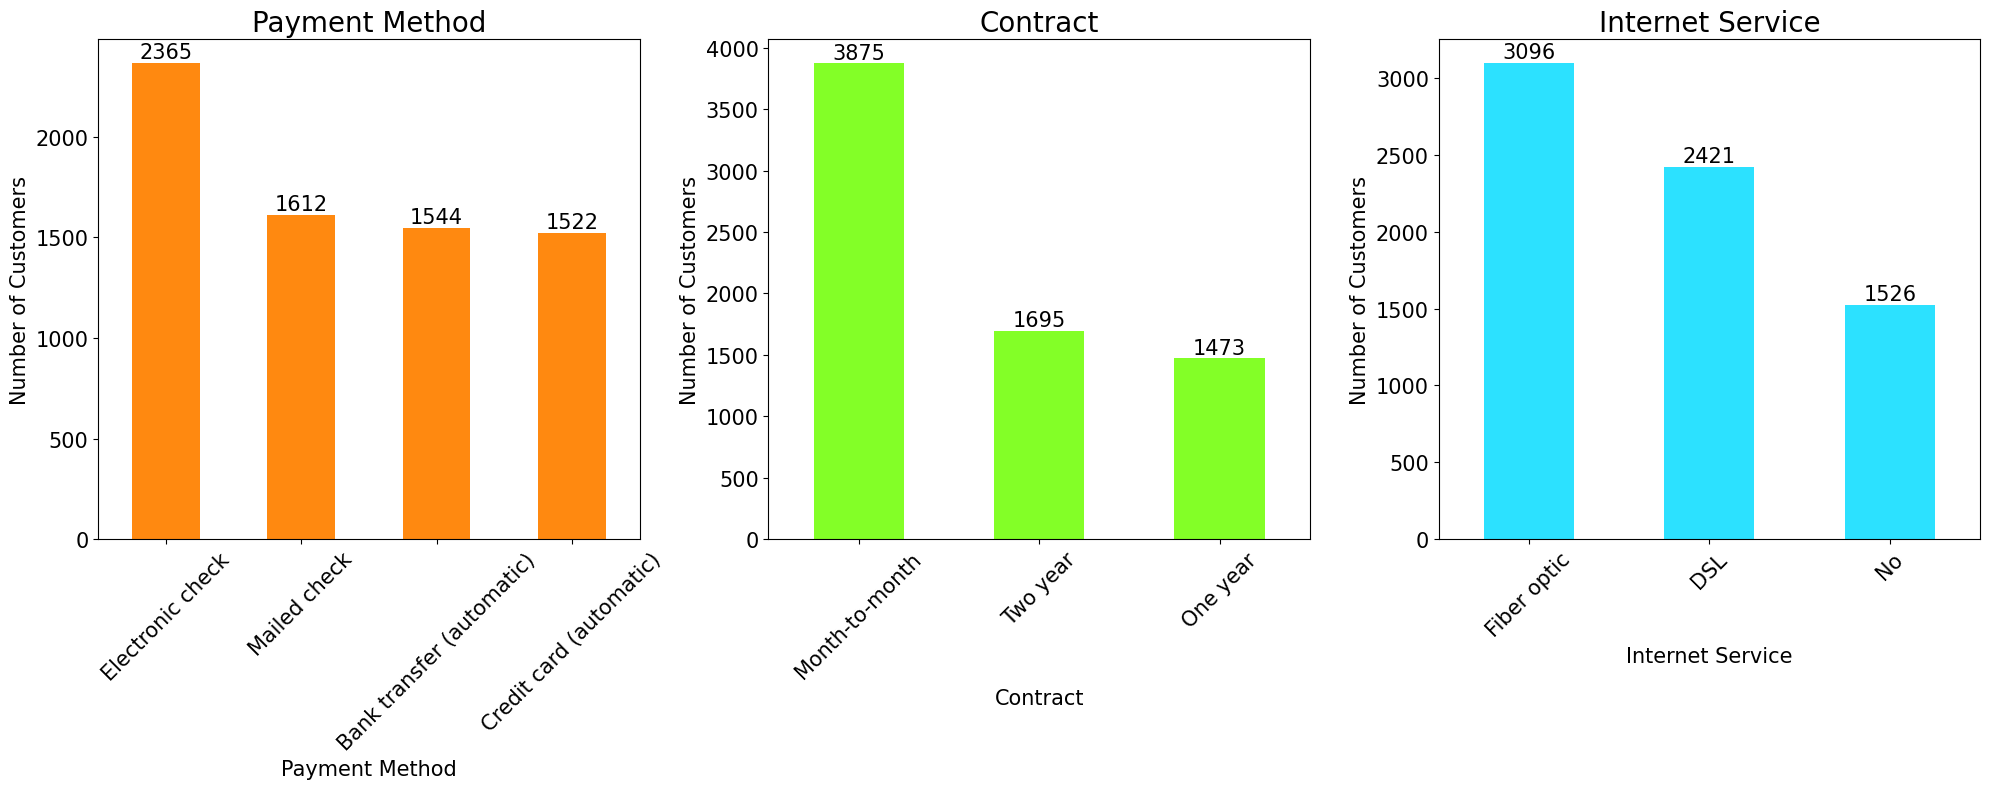

In [8]:
def plot_categorical_counts(data_series, ax, title='', xlabel='', ylabel='', colors=None):
    if colors is None:
        colors = ['#FF8910', '#83FF27', '#2CE1FF']  # Default colors
    
    data_series.plot(kind='bar', ax=ax, color=colors)
    
    ax.set_title(title, fontsize=20)
    ax.set_xlabel(xlabel, fontsize=15)
    ax.set_ylabel(ylabel, fontsize=15)
    ax.tick_params(axis='x', labelrotation=45, labelsize=15)  # Rotate x-labels
    ax.tick_params(axis='y', labelrotation=0, labelsize=15)  # Rotate y-labels

    # Annotate bars with count values
    fontsize1 = 15
    for idx, count in enumerate(data_series):
        ax.text(idx, count + 5, str(count), ha='center', va='bottom', fontsize=fontsize1)

    plt.tight_layout()

# Create subplots for each bar chart in a single row
fig, axes = plt.subplots(1, 3, figsize=(20, 8))

payment_counts = df['PaymentMethod'].value_counts()
plot_categorical_counts(payment_counts, axes[0], title='Payment Method', xlabel='Payment Method', ylabel='Number of Customers', colors=['#FF8910'])

contract_counts = df['Contract'].value_counts()
plot_categorical_counts(contract_counts, axes[1], title='Contract', xlabel='Contract', ylabel='Number of Customers', colors=['#83FF27'])

internet_counts = df['InternetService'].value_counts()
plot_categorical_counts(internet_counts, axes[2], title='Internet Service', xlabel='Internet Service', ylabel='Number of Customers', colors=['#2CE1FF'])

plt.show()


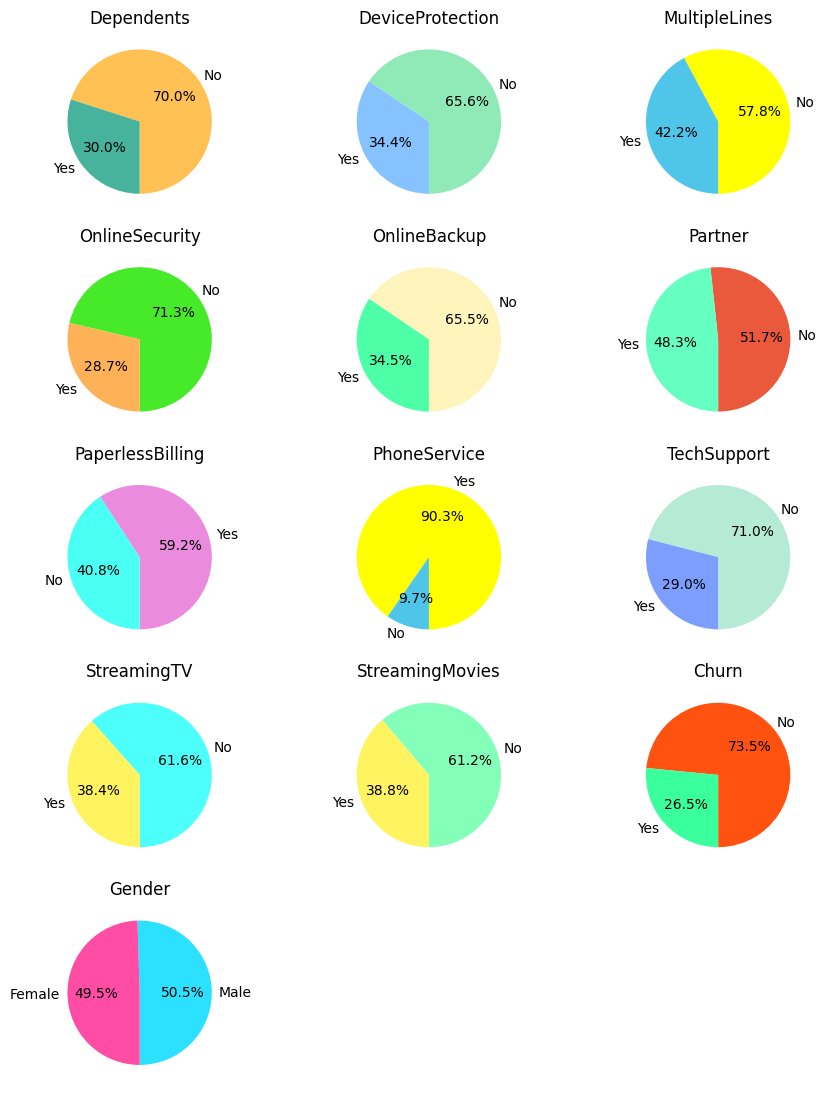

In [9]:
def plot_features_pie_chart(df, features_to_plot, num_rows, num_cols, colors, startangles):
    # Create subplots for the specified features
    fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(9, 12))

    # Flatten the axes array for easy indexing
    axes = axes.flatten()

    # Loop through features and create pie charts
    for i, feature in enumerate(features_to_plot):
        ax = axes[i]
        value_counts = df[feature].value_counts()

        ax.pie(value_counts, labels=value_counts.index, autopct='%1.1f%%',
               colors=colors[i % len(colors)], startangle=startangles[i % len(startangles)])
        ax.set_title(feature)

    # Hide remaining empty subplots
    for i in range(len(features_to_plot), num_rows * num_cols):
        fig.delaxes(axes[i])

    # Adjust layout and display the plots
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust rect parameter to increase vertical spacing
    plt.show()

# List of features to plot
features_to_plot = ['Dependents', 'DeviceProtection', 'MultipleLines', 'OnlineSecurity',
                    'OnlineBackup', 'Partner', 'PaperlessBilling', 'PhoneService',
                    'TechSupport', 'StreamingTV', 'StreamingMovies', 'Churn', 'Gender']

# Define other parameters
num_rows = 5
num_cols = 3

colors = [['#FFC154','#47B39C'],['#8FEAB7','#85C2FF'],
         ['#FFFF00','#50C5EA'],['#47EA28','#FFB157'],
         ['#FFF4BB','#4DFFA6'],['#EA593B','#64FFC1'],
         ['#EA8BDD','#4AFFF3'],['#FFFF00','#50C5EA'],
         ['#B5EAD5','#7B9EFF'],['#4DFFFA','#FFF45F'],
         ['#83FFB9','#FFF45F'],['#FF5110','#39FF9D'],
         ['#2CE1FF','#FF4DA6']]

startangles = [270, 270, 270, 270, 270, 270, 270, 270, 270, 270, 270, 270, 270, 270]

# Call the function to generate pie charts
plot_features_pie_chart(df, features_to_plot, num_rows, num_cols, colors, startangles)


### TotalCharges and Tenure Analysis
Analyzing the 'TotalCharges' and 'Tenure' features, handling missing values, and visualizing their distribution across different contract types.

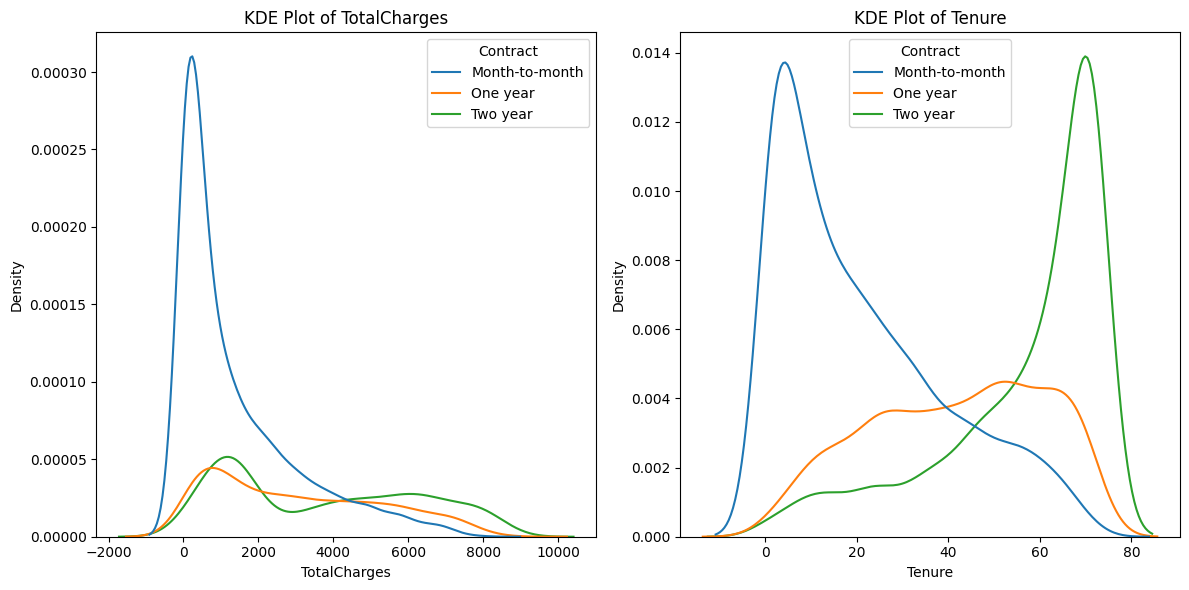

Sum of TotalCharges for each contract type
Contract
Month-to-month    5305861.500
One year          4468450.975
Two year          6297228.450
Name: TotalCharges, dtype: float64
Sum of users of each type of contracts
Contract
Month-to-month    3875
Two year          1695
One year          1473
Name: count, dtype: int64
The mean tenure for each contract type
Contract
Month-to-month    21.033333
One year          41.674063
Two year          56.602914
Name: Tenure, dtype: float64


In [10]:
def visualize_contract_metrics(df):
    # Clean 'TotalCharges' column
    df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
    df['TotalCharges'].fillna(df['TotalCharges'].median(), inplace=True)

    # Clean 'Tenure' column
    df['Tenure'] = pd.to_numeric(df['Tenure'], errors='coerce')

    # Filter the DataFrame for 'Churn' values equal to 'No'
    no_churn = df[df['Churn'] == 'No']

    # Create subplots
    fig, ax = plt.subplots(1, 2, figsize=(12, 6))

    # Plot KDE for 'TotalCharges'
    sns.kdeplot(data=df, x='TotalCharges', hue='Contract', ax=ax[0])
    ax[0].set_title('KDE Plot of TotalCharges')
    ax[0].set_xlabel('TotalCharges')
    ax[0].set_ylabel('Density')

    # Plot KDE for 'Tenure'
    sns.kdeplot(data=no_churn, x='Tenure', hue='Contract', ax=ax[1])
    ax[1].set_title('KDE Plot of Tenure')
    ax[1].set_xlabel('Tenure')
    ax[1].set_ylabel('Density')

    plt.tight_layout()
    plt.show()

    print("\033[1mSum of TotalCharges for each contract type\033[0m")
    print(df.groupby('Contract').sum()['TotalCharges'])

    print("\033[1mSum of users of each type of contracts\033[0m")
    print(df['Contract'].value_counts())

    print("\033[1mThe mean tenure for each contract type\033[0m")
    print(no_churn.groupby('Contract')['Tenure'].mean())

# Example usage
visualize_contract_metrics(df)


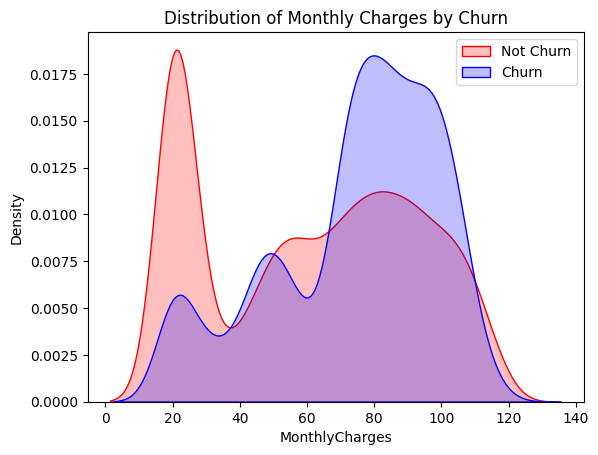

In [11]:
def plot_churn_distribution(data, column_name, title):
    ax = sns.kdeplot(data[column_name][(data["Churn"] == 'No')], color="Red", shade=True)
    ax = sns.kdeplot(data[column_name][(data["Churn"] == 'Yes')], ax=ax, color="Blue", shade=True)
    ax.legend(["Not Churn", "Churn"], loc='upper right')
    ax.set_ylabel('Density')
    ax.set_xlabel(column_name)
    ax.set_title(title)
    plt.show()

# Example 1: Monthly Charges
plot_churn_distribution(df, 'MonthlyCharges', 'Distribution of Monthly Charges by Churn')

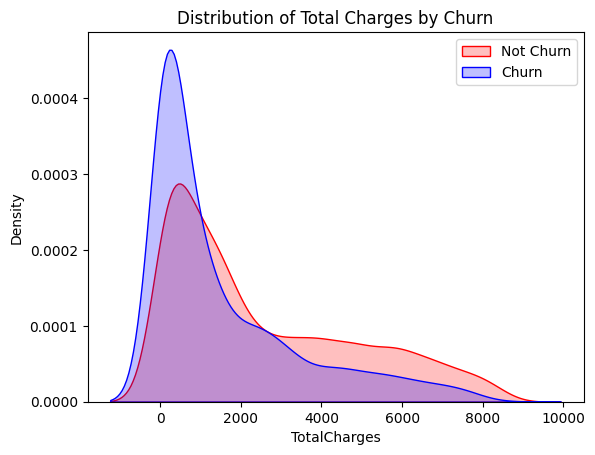

In [12]:
# Example 2: Total Charges
plot_churn_distribution(df, 'TotalCharges', 'Distribution of Total Charges by Churn')

### Label Encoding for Categorical Features
Performing label encoding for categorical features to convert them into numerical format for machine learning algorithms.

In [13]:
def label_encode_columns(df, columns_to_encode, label_mapping=None):
    if label_mapping is None:
        label_mapping = {}
    
    for column in columns_to_encode:
        le = preprocessing.LabelEncoder()
        unique_values = label_mapping.get(column, df[column].unique())
        df[column] = le.fit_transform(df[column])
    
    return df

# Columns to be encoded
columns_to_encode = ['Gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
                     'InternetService', 'OnlineSecurity', 'OnlineBackup', 'TechSupport',
                     'DeviceProtection', 'StreamingTV', 'StreamingMovies', 'Contract',
                     'PaperlessBilling', 'PaymentMethod', 'Churn']

# Create a dictionary to map unique values to labels
label_mapping = {
    'Gender': ['Female', 'Male'],
    'Partner': ['No', 'Yes'],
    'Dependents': ['No', 'Yes'],
    'PhoneService': ['No', 'Yes'],
    'MultipleLines' : ['No', 'Yes'],
    'InternetService' : ['DSL', 'Fiber optic', 'No'],
    'OnlineSecurity' : ['No', 'Yes'],
    'OnlineBackup' : ['No', 'Yes'],
    'TechSupport' : ['No', 'Yes'],
    'DeviceProtection' : ['No', 'Yes',],
    'StreamingTV' : ['No', 'Yes'],
    'StreamingMovies' : ['No', 'Yes'],
    'Contract' : ['Month-to-month','Two year','One year'],
    'PaperlessBilling' :['No','Yes'],
    'PaymentMethod' : ['Electronic check','Mailed check','Bank transfer (automatic)','Credit card (automatic)'],
    'Churn': ['No', 'Yes']
}

df = label_encode_columns(df.copy(), columns_to_encode, label_mapping)
# 0-> No,  1 -> Yes
# 0-> Female,  1 -> Male
# 0->Month-to-month, 1->One year, 2->Two year
# 0->Bank transfer (automatic), 1->Credit card (automatic), 2->Electronic check, 3->Mailed check
# DSL ->0, Fiber->1, No->2

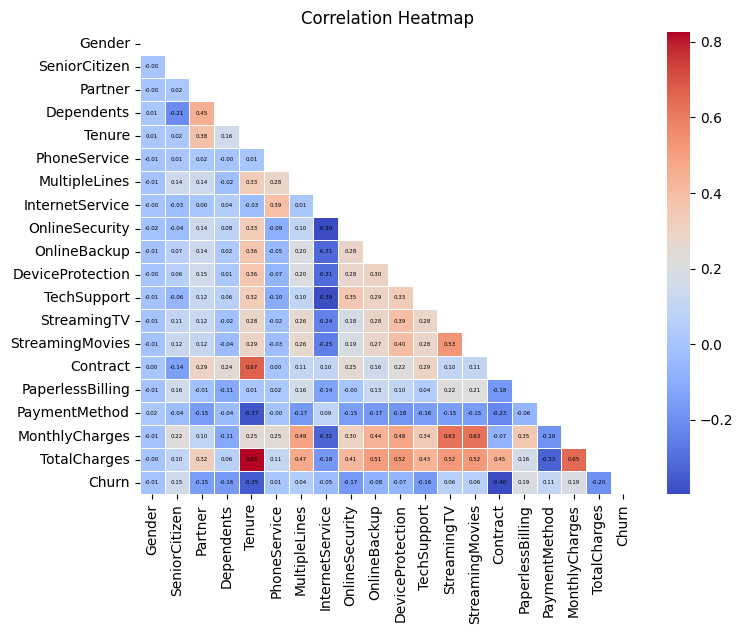

In [14]:
# Assuming you already have the correlation matrix
correlation_matrix = df.corr()

# Create a mask for the upper triangle (including diagonal)
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Set the upper triangle values to NaN
correlation_matrix = correlation_matrix.mask(mask)

# Define annotation style
annot_font_size = 4
annot_style = {
    'fontsize': annot_font_size,
    'color': 'black',  # You can customize the color if needed
    'verticalalignment': 'center',
    'horizontalalignment': 'center',
}

# Create a heatmap with custom annotation style
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", linewidths=.5, fmt=".2f", annot_kws=annot_style)
plt.title("Correlation Heatmap")
plt.show()

In [15]:
df.describe()

,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.504756,0.162147,0.483033,0.299588,32.371149,0.903166,0.421837,0.872923,0.286668,0.344881,0.343888,0.290217,0.384353,0.387903,0.690473,0.592219,1.574329,64.761692,2281.916928,0.265370
std,0.500013,0.368612,0.499748,0.458110,24.559481,0.295752,0.493888,0.737796,0.452237,0.475363,0.475038,0.453895,0.486477,0.487307,0.833755,0.491457,1.068104,30.090047,2265.270398,0.441561
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,18.800000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,35.500000,402.225000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,29.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2.000000,70.350000,1397.475000,0.000000
75%,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,89.850000,3786.600000,1.000000
max,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,118.750000,8684.800000,1.000000


In [16]:
df.head(10)

,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,1,0,1,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,1,1,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,0,0,1,0,1,1,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1
5,0,0,0,0,8,1,1,1,0,0,1,0,1,1,0,1,2,99.65,820.50,1
6,1,0,0,1,22,1,1,1,0,1,0,0,1,0,0,1,1,89.10,1949.40,0
7,0,0,0,0,10,0,0,0,1,0,0,0,0,0,0,0,3,29.75,301.90,0
8,0,0,1,0,28,1,1,1,0,0,1,1,1,1,0,1,2,104.80,3046.05,1
9,1,0,0,1,62,1,0,0,1,1,0,0,0,0,1,0,0,56.15,3487.95,0


### Feature Selection
Selecting the top k best features using the SelectKBest algorithm and the chi-squared test, and creating a new DataFrame with only the selected features along with the target column 'Churn'.

We also used the RandomForestClassifier, ExhaustiveFeatureSelector, and the GenericUnivariateSelect methods to double check the selected features.

In [17]:
def select_k_best_features(df, target_column, num_features_to_select):
    X = df.drop(target_column, axis=1)
    y = df[target_column]

    select_k_best = SelectKBest(score_func=chi2, k=num_features_to_select)
    X_new = select_k_best.fit_transform(X, y)

    selected_feature_indices = select_k_best.get_support(indices=True)
    selected_feature_names = X.columns[selected_feature_indices]

    df_selected_features = pd.DataFrame(data=X_new, columns=selected_feature_names)
    df_selected_features[target_column] = y

    return df_selected_features

# Example usage
df_selected_features = select_k_best_features(df, 'Churn', num_features_to_select=5)
print("\033[1mSelected Features using k_best model:\033[0m")
print(df_selected_features.columns)

Selected Features using k_best model:
Index(['Tenure', 'OnlineSecurity', 'Contract', 'MonthlyCharges',
       'TotalCharges', 'Churn'],
      dtype='object')


In [18]:
from sklearn.feature_selection import SelectFromModel

def select_features_using_random_forest(df, target_column, n_estimators=25):
    X = df.drop([target_column], axis=1)
    y = df[target_column]

    sel = SelectFromModel(RandomForestClassifier(n_estimators=n_estimators))
    sel.fit(X, y)

    selected_feature_mask = sel.get_support()
    selected_feature_names = X.columns[selected_feature_mask]

    return selected_feature_names

# Example usage
selected_features = select_features_using_random_forest(df, 'Churn', n_estimators=25)
print("\033[1mSelected Features using random forest model:\033[0m")
print(selected_features)


Selected Features using random forest model:
Index(['Tenure', 'Contract', 'MonthlyCharges', 'TotalCharges'], dtype='object')


In [19]:
def select_features_generic_univariate(df, target_column, mode='k_best', param=5):
    X = df.drop([target_column], axis=1)
    y = df[target_column]

    transformer = GenericUnivariateSelect(score_func=f_classif, mode=mode, param=param)
    X_new = transformer.fit_transform(X, y)

    selected_feature_indices = transformer.get_support()
    selected_feature_names = X.columns[selected_feature_indices]

    return selected_feature_names

# Example usage
selected_features = select_features_generic_univariate(df, 'Churn', mode='k_best', param=5)
print("\033[1mSelected Features using generic_univariate model:\033[0m")
print(selected_features)


Selected Features using generic_univariate model:
Index(['Tenure', 'Contract', 'PaperlessBilling', 'MonthlyCharges',
       'TotalCharges'],
      dtype='object')


### Feature-Specific Accuracy Calculation using Logistic Regression
This code snippet focuses on calculating accuracy scores for specific features in a dataset using logistic regression. It defines a list of selected features, splits the dataset into training and testing sets, and then employs logistic regression to predict outcomes. The accuracy score for each individual feature is computed and presented in percentage form. This approach provides insights into how well the logistic regression model performs for each feature independently.

In [20]:
# Define the list of features
features = ['Tenure', 'Contract', 'MonthlyCharges', 'TotalCharges', 'OnlineSecurity', 'PaymentMethod']

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(df[features], df['Churn'], test_size=0.2, random_state=1)

def calculate_accuracy(X_train, y_train, X_test, y_test):
    model = LogisticRegression(C=0.01, solver='liblinear')
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    score = model.score(X_test, y_test)
    return predictions, score

def get_feature_accuracy(features, X_train, y_train, X_test, y_test):
    feature_accuracies = {}
    for feature in features:
        X_train_feature = X_train[[feature]]
        X_test_feature = X_test[[feature]]
        predictions, accuracy = calculate_accuracy(X_train_feature, y_train, X_test_feature, y_test)
        feature_accuracies[feature] = accuracy
    return feature_accuracies

# Calculate and print accuracy scores for each feature
feature_accuracies = get_feature_accuracy(features, X_train, y_train, X_test, y_test)
for feature, accuracy in feature_accuracies.items():
    print(f'{feature} accuracy score: {accuracy * 100:.2f}%')


Tenure accuracy score: 75.09%
Contract accuracy score: 75.30%
MonthlyCharges accuracy score: 75.30%
TotalCharges accuracy score: 75.30%
OnlineSecurity accuracy score: 75.30%
PaymentMethod accuracy score: 75.30%


### Hypothesis testing by applying Chi-Square Test for Categorical Feature Independence
Performing the chi-square test for independence between categorical variables and the target variable 'Churn' to determine if there is a significant relationship between the categorical feature and the target and to accept or reject the null hypothesis.

- H0 = There is no significant relationship between the feature selected and Churn.
- Ha = There is a significant relationship between the feature selected and Churn..

In [21]:
from tabulate import tabulate

def perform_chi_square_test(df, categorical_var, churn, significance=0.05):
    contingency_table = pd.crosstab(df[categorical_var], df[churn])
    chi2, p_value, dof, expected = chi2_contingency(contingency_table)
    
    if p_value < significance:
        result = "Reject (Significant)"
    else:
        result = "Fail to Reject (Not Significant)"
    
    return [categorical_var, p_value, result]

# Select categorical variables and churn
categorical_vars = ['Gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
                     'InternetService', 'OnlineSecurity', 'OnlineBackup', 'TechSupport',
                     'DeviceProtection', 'StreamingTV', 'StreamingMovies', 'Contract',
                     'PaperlessBilling', 'PaymentMethod']
churn = "Churn"

# Perform the chi-square test for each categorical variable
results = []
for categorical_var in categorical_vars:
    result = perform_chi_square_test(df, categorical_var, churn)
    results.append(result)

# Create a pandas DataFrame for tabulation
result_df = pd.DataFrame(results, columns=["Categorical Variable", "P-value", "Result"])

# Display results as a table
print(tabulate(result_df, headers="keys", tablefmt="pretty", showindex=False))


+----------------------+-------------------------+----------------------------------+
| Categorical Variable |         P-value         |              Result              |
+----------------------+-------------------------+----------------------------------+
|        Gender        |   0.48657873605618596   | Fail to Reject (Not Significant) |
|       Partner        | 2.1399113440759935e-36  |       Reject (Significant)       |
|      Dependents      | 4.9249216612154196e-43  |       Reject (Significant)       |
|     PhoneService     |   0.3387825358066928    | Fail to Reject (Not Significant) |
|    MultipleLines     |  0.0008433795342472428  |       Reject (Significant)       |
|   InternetService    | 9.571788222840544e-160  |       Reject (Significant)       |
|    OnlineSecurity    | 1.2320984831180025e-46  |       Reject (Significant)       |
|     OnlineBackup     |  6.214092807254819e-12  |       Reject (Significant)       |
|     TechSupport      | 2.9235674453140758e-43  |    

### Proportion of Churned Customers
Visualizing the proportion of churned customers for each category of selected categorical variables using bar plots.

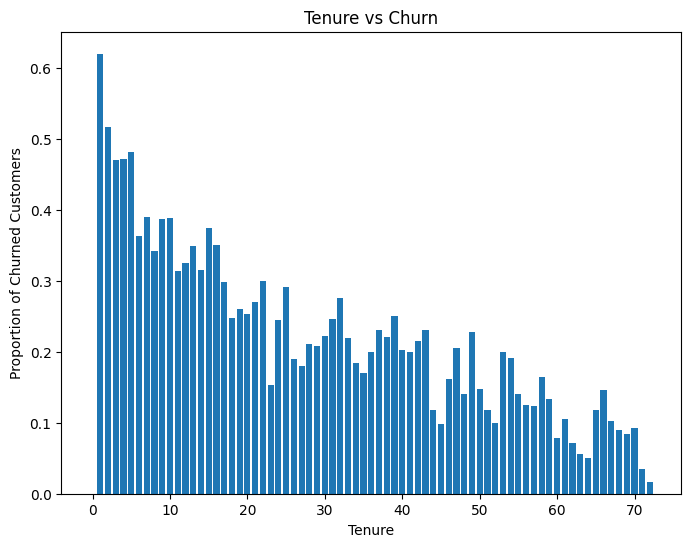

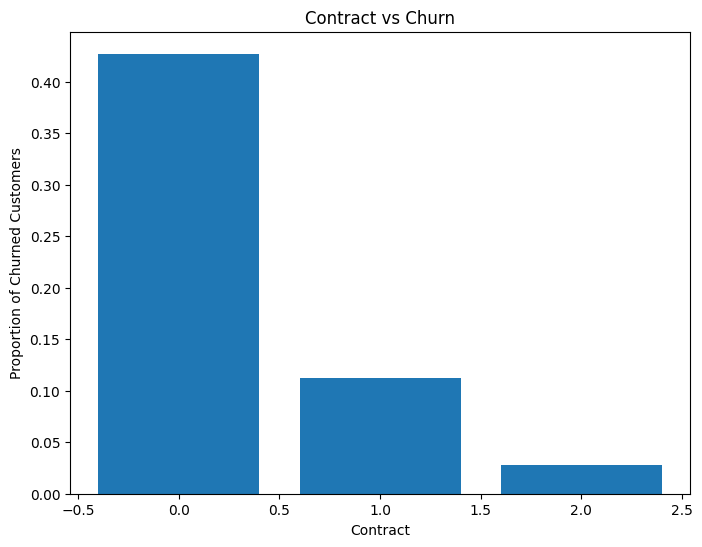

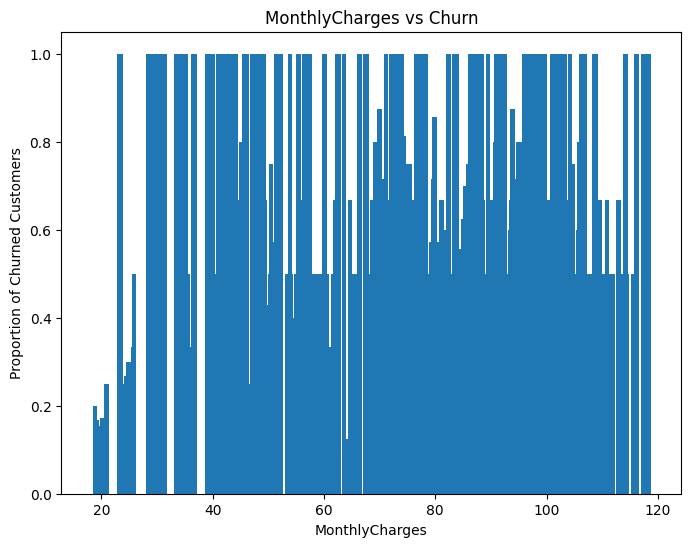

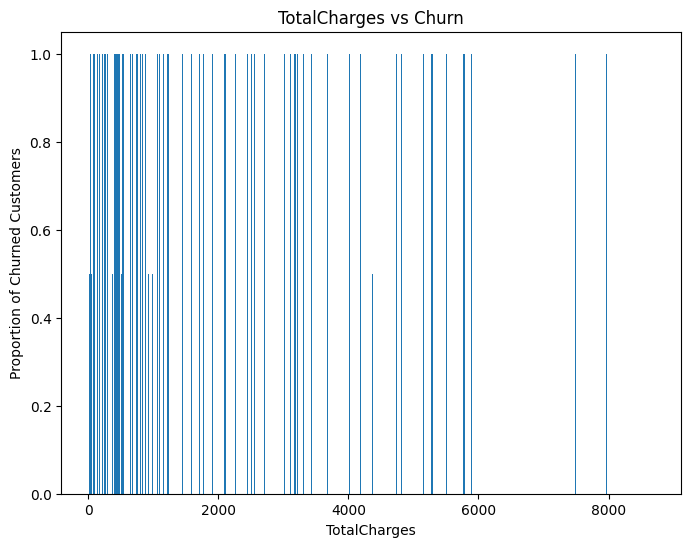

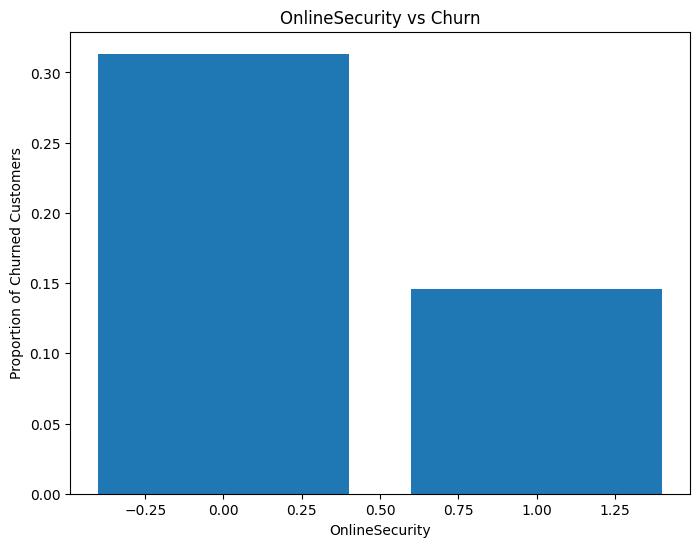

In [22]:
def plot_categorical_vs_churn(df, categorical_var, churn):
    # Create a contingency table
    contingency_table = pd.crosstab(df[categorical_var], df[churn])

    # Perform the Chi-Square test
    chi2, p_value, dof, expected = chi2_contingency(contingency_table)

    # Calculate the proportion of churned customers for each category
    churn_proportion = contingency_table[1] / contingency_table.sum(axis=1)

    # Plot the bar plot
    plt.figure(figsize=(8, 6))
    plt.bar(churn_proportion.index, churn_proportion.values)
    plt.title(f"{categorical_var} vs Churn")
    plt.xlabel(categorical_var)
    plt.ylabel("Proportion of Churned Customers")
    plt.show()

# Select categorical variables and churn
categorical_vars = ['Tenure', 'Contract', 'MonthlyCharges', 'TotalCharges', 'OnlineSecurity']
churn = 'Churn'

# Plot each categorical variable against churn
for categorical_var in categorical_vars:
    plot_categorical_vs_churn(df, categorical_var, churn)


### Visualizing Churn Analysis
Creating various visualizations to analyze churn in the dataset, including histograms of tenure and monthly charges, as well as a count plot comparing contract types and churn.

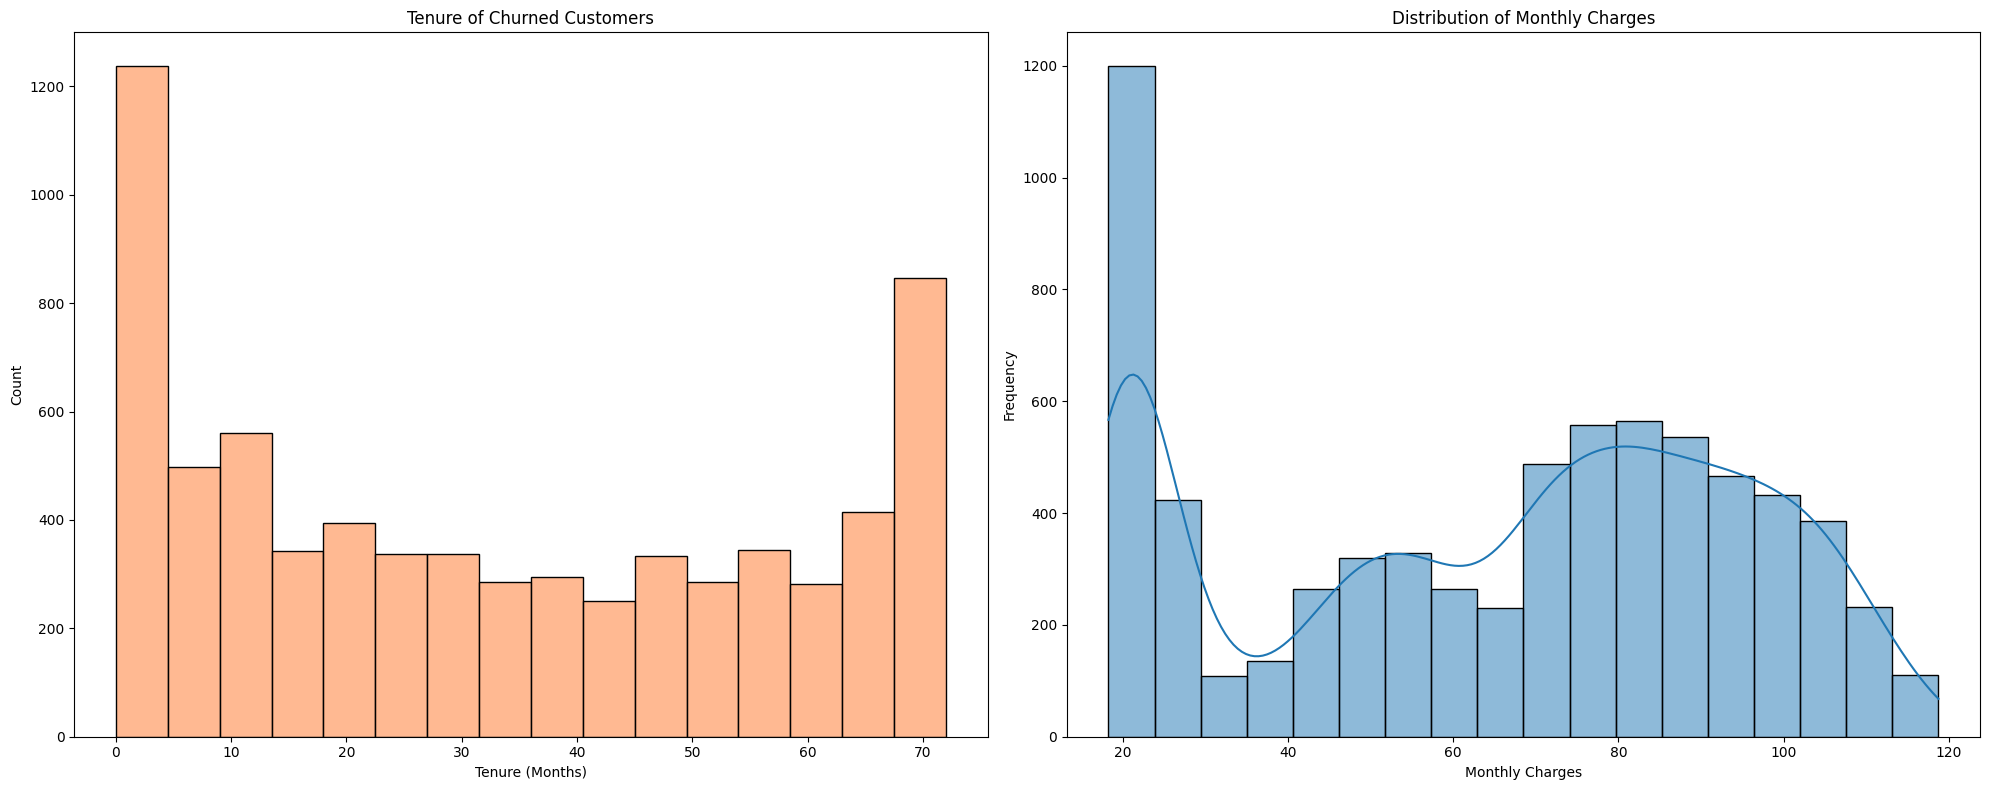

In [23]:
# Create a figure with subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 8))

# Plot 1: Tenure of Churned Customers
sns.histplot(df['Churn'], x=df['Tenure'], bins='auto', color='#ffa26e', ax=axes[0])
axes[0].set_xlabel("Tenure (Months)")
axes[0].set_ylabel("Count")
axes[0].set_title("Tenure of Churned Customers")

# Plot 2: Distribution of Monthly Charges
sns.histplot(df['MonthlyCharges'], bins='auto', kde=True, ax=axes[1])
axes[1].set_xlabel("Monthly Charges")
axes[1].set_ylabel("Frequency")
axes[1].set_title("Distribution of Monthly Charges")

# Adjust spacing between subplots
plt.tight_layout()

# Display the combined plot
plt.show()

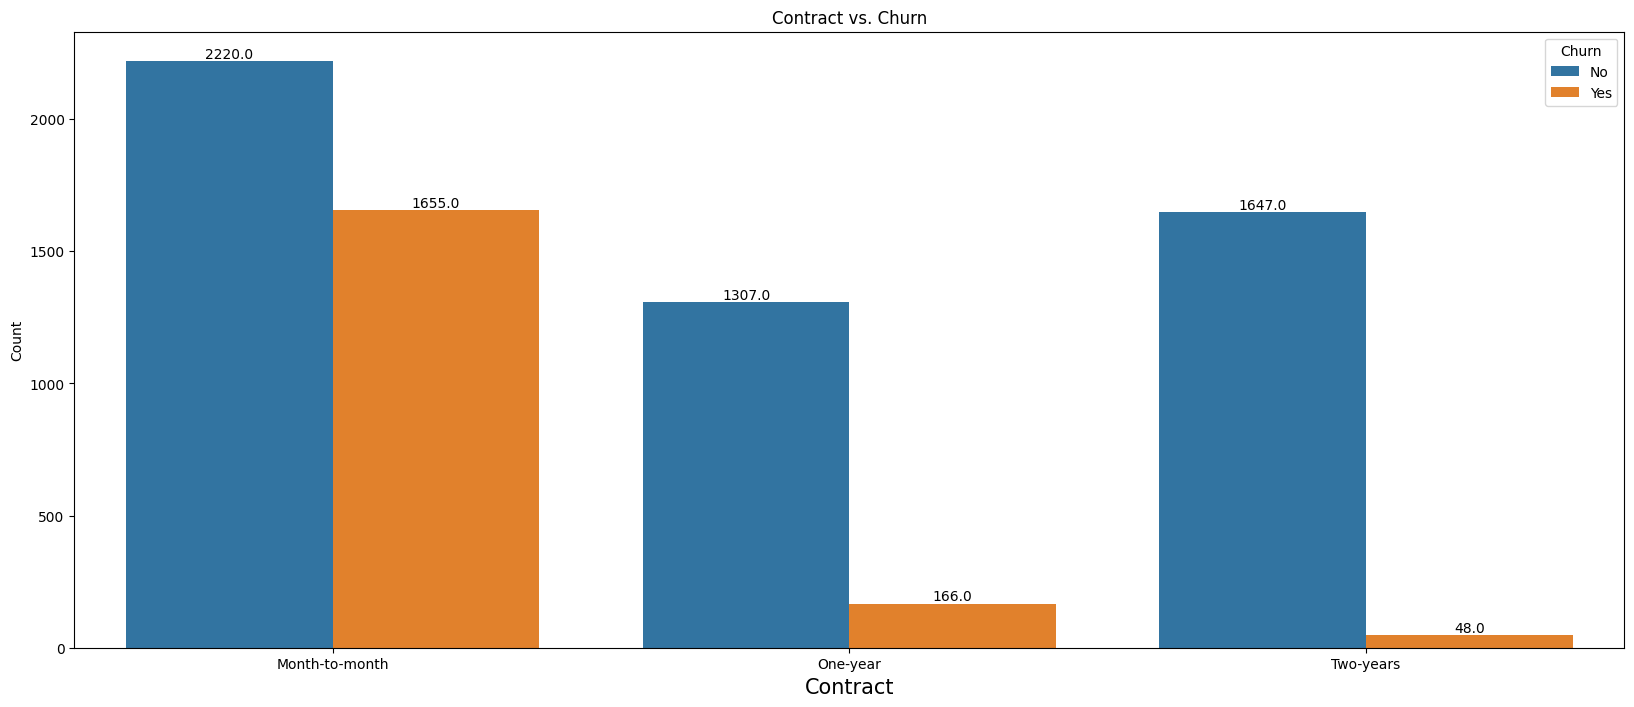

In [24]:
plt.figure(figsize=(20, 8))  
ax = sns.countplot(x='Contract', hue='Churn', data=df)
ax.set_xticklabels(('Month-to-month', 'One-year', 'Two-years'))
ax.tick_params(axis='x', labelsize=10)

# Adding labels and title
plt.xlabel("Contract", size=15)
plt.ylabel("Count")
plt.title("Contract vs. Churn")

# Calculating the count for each category
total = len(df)
for p in ax.patches:
    count = p.get_height()
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.text(x, y, f'{count}', ha='center', va='bottom')

# Displaying the count plot
plt.legend(title="Churn", loc='upper right', labels=['No', 'Yes'])
plt.show()

### Features extraction
Trying to extract features and calculate the model accuracy after involving these features to find out if there are benefits from using them. 

In [25]:
df['TotalPayment'] = df['Tenure'] * df['MonthlyCharges']
df['HasOnlineSecurityBackup'] = df['OnlineSecurity'] & df['OnlineBackup']
df['HasTechSupportAndDeviceProtection'] = df['TechSupport'] & df['DeviceProtection']
df['MonthlyToTotalChargesRatio'] = df['MonthlyCharges'] / df['TotalCharges']
service_columns = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies'] 
df['AdditionalServices'] = df[service_columns].sum(axis=1)
df["NEW_noProt"] = df.apply(lambda x: 1 if (x["OnlineBackup"] != 1) or (x["DeviceProtection"] != 1) or (x["TechSupport"] != 1) else 0, axis=1)
df["NEW_AVG_Charges"] = df["TotalCharges"] / (df["Tenure"] + 1)
df["NEW_Increase"] = df["NEW_AVG_Charges"] / df["MonthlyCharges"]
df["NEW_AVG_Service_Fee"] = df["MonthlyCharges"] / (df['AdditionalServices'] + 1)


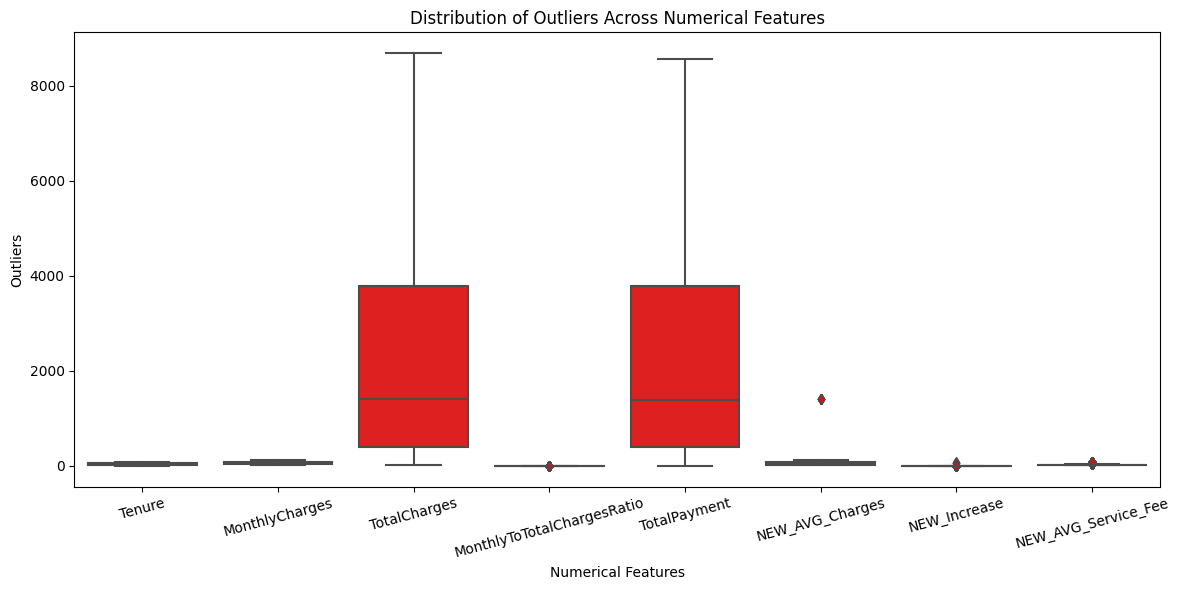

In [26]:


# Select numerical columns for plotting
num_features = ['Tenure', 'MonthlyCharges', 'TotalCharges', 'MonthlyToTotalChargesRatio', 'TotalPayment', 'NEW_AVG_Charges', "NEW_Increase", 'NEW_AVG_Service_Fee']

# Create a DataFrame with the scaled data
scaled_df = pd.DataFrame(df[num_features], columns=num_features)

# Create a boxplot for each numerical feature to show the distribution of outliers
plt.figure(figsize=(12, 6))
sns.boxplot(data=scaled_df, orient="v", color='red', flierprops={'markerfacecolor': 'red'})

# Set the plot title and labels
plt.title("Distribution of Outliers Across Numerical Features")
plt.xlabel("Numerical Features")
plt.ylabel("Outliers")

# Rotate x-axis labels for better readability (optional)
plt.xticks(rotation=15)

# Adjust spacing
plt.tight_layout()

# Save the figure as an image
plt.savefig('scaled_outliers_boxplot.png', dpi=100)

# Show the plot (optional)
plt.show()


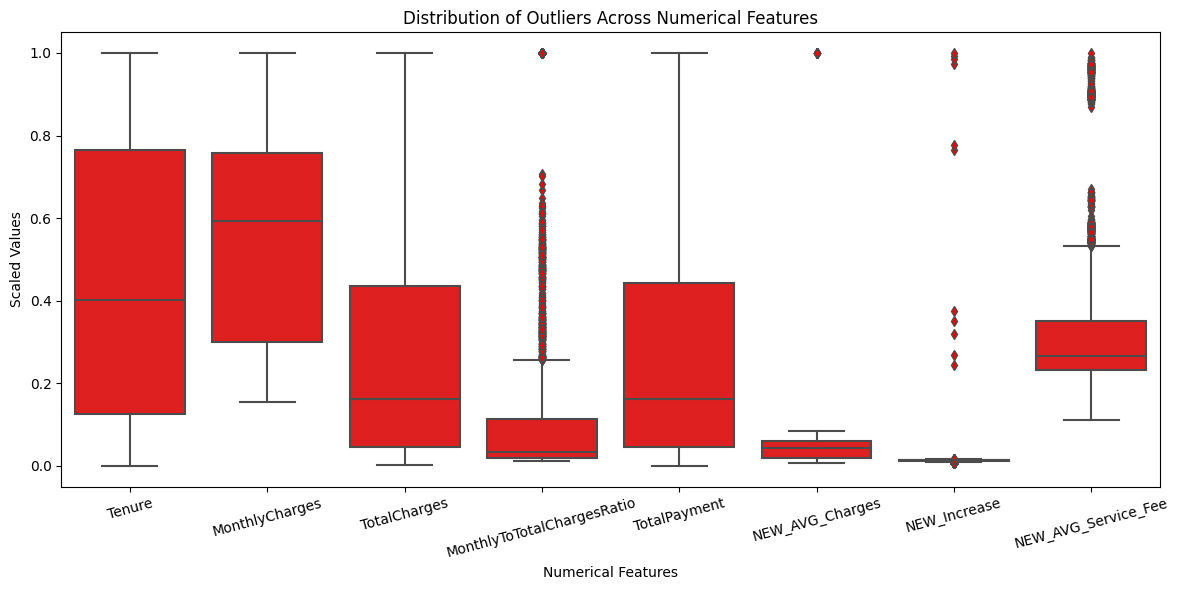

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MaxAbsScaler

# Select numerical columns for plotting
num_features = ['Tenure', 'MonthlyCharges', 'TotalCharges', 'MonthlyToTotalChargesRatio', 'TotalPayment', 'NEW_AVG_Charges', "NEW_Increase", 'NEW_AVG_Service_Fee']

# Create a MaxAbsScaler instance
scaler = MaxAbsScaler()

# Scale the numerical features
scaled_data = scaler.fit_transform(df[num_features])

# Create a DataFrame with the scaled data
scaled_df = pd.DataFrame(scaled_data, columns=num_features)

# Create a boxplot for each numerical feature to show the distribution of outliers
plt.figure(figsize=(12, 6))
sns.boxplot(data=scaled_df, orient="v", color='red', flierprops={'markerfacecolor': 'red'})

# Set the plot title and labels
plt.title("Distribution of Outliers Across Numerical Features")
plt.xlabel("Numerical Features")
plt.ylabel("Scaled Values")

# Rotate x-axis labels for better readability (optional)
plt.xticks(rotation=15)

# Adjust spacing
plt.tight_layout()

# Save the figure as an image
plt.savefig('scaled_outliers_boxplot.png', dpi=100)

# Show the plot (optional)
plt.show()


### Principal Component Analysis (PCA)

Explained Variance Ratios:
[4.84774157e-01 1.20292561e-01 8.36907049e-02 4.90381416e-02
 3.03155121e-02 2.62873935e-02 2.54989964e-02 2.48767476e-02
 2.01209513e-02 1.94949354e-02 1.61468956e-02 1.59623304e-02
 1.50272547e-02 1.36014876e-02 1.15412750e-02 1.02449465e-02
 7.50470419e-03 7.01892902e-03 5.80793423e-03 4.39407067e-03
 3.09482876e-03 2.21483630e-03 1.76427971e-03 7.49029711e-04
 3.07335405e-04 2.16228238e-04 1.05645705e-05 2.96847287e-06
 9.56048450e-32]


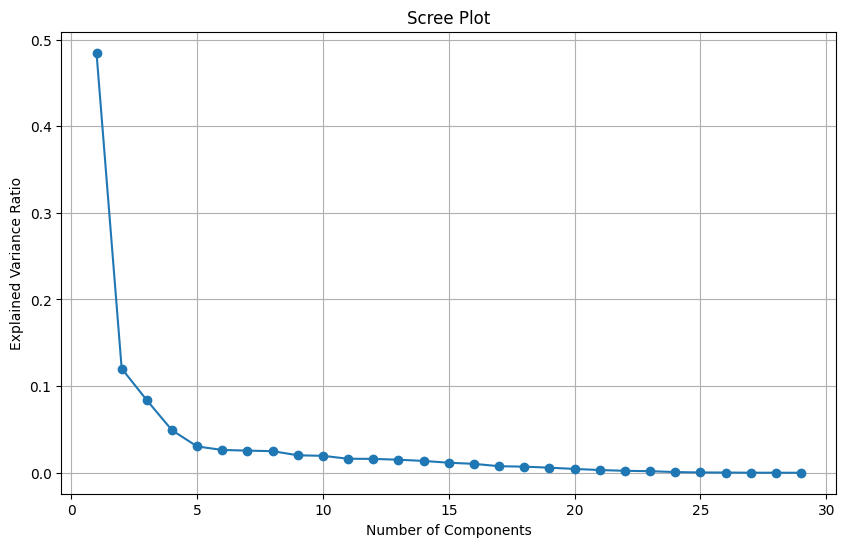

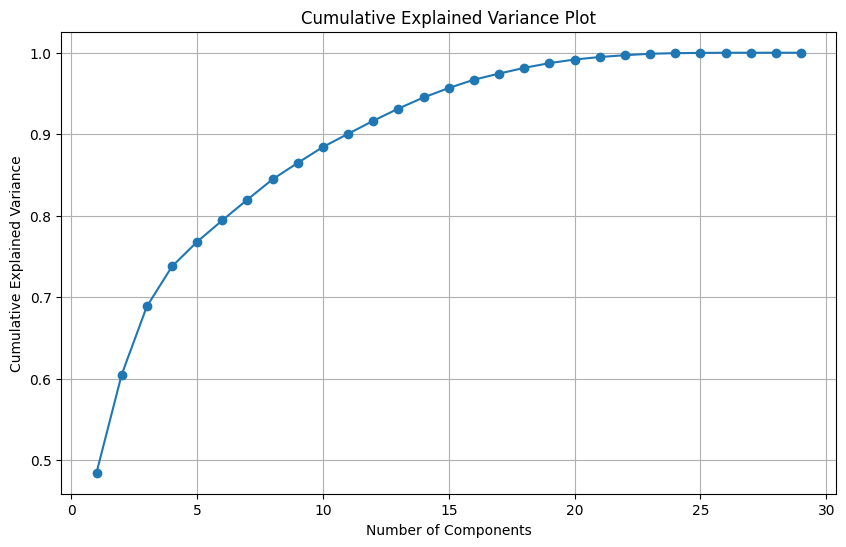

In [28]:
def perform_pca_and_plot_variance(df, num_features):
    # Define X and y
    y = df['Churn']
    X_cat = df.drop(columns='Churn')
    X_cat = df.drop(columns=num_features)
    X_num = df[num_features]

    scaler = MaxAbsScaler()
    X_num_scaled = scaler.fit_transform(X_num)
    X_num_scaled = pd.DataFrame(X_num_scaled, columns=num_features)

    X = pd.concat([X_cat, X_num_scaled], axis=1)

    pca = PCA()

    # Fit PCA to the scaled data
    pca.fit(X, y)

    # Calculate the explained variance ratio for each component
    explained_variance_ratio = pca.explained_variance_ratio_

    # Create a scree plot to visualize explained variance vs. number of components
    plt.figure(figsize=(10, 6))
    plt.plot(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, marker='o', linestyle='-')
    plt.title('Scree Plot')
    plt.xlabel('Number of Components')
    plt.ylabel('Explained Variance Ratio')
    plt.grid(True)

    # Calculate the cumulative explained variance
    cumulative_variance = np.cumsum(explained_variance_ratio)

    # Create a cumulative explained variance plot
    plt.figure(figsize=(10, 6))
    plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='-')
    plt.title('Cumulative Explained Variance Plot')
    plt.xlabel('Number of Components')
    plt.ylabel('Cumulative Explained Variance')
    plt.grid(True)

    # You can also print out the explained variance ratios for reference
    print("Explained Variance Ratios:")
    print(explained_variance_ratio)

    plt.show()

# Define the list of numerical features to use for PCA
num_features = ['Tenure', 'MonthlyCharges', 'TotalCharges', 'MonthlyToTotalChargesRatio', 'TotalPayment', 'NEW_AVG_Charges', "NEW_Increase", 'NEW_AVG_Service_Fee']

# Perform PCA and plot variance
perform_pca_and_plot_variance(df, num_features)


In [29]:
def perform_pca_and_get_loadings(df, num_features, n_components=5):
    # Define X and y
    y = df['Churn']
    X_cat = df.drop(columns='Churn')
    X_cat = df.drop(columns=num_features)
    X_num = df[num_features]

    scaler = MaxAbsScaler()
    X_num_scaled = scaler.fit_transform(X_num)
    X_num_scaled = pd.DataFrame(X_num_scaled, columns=num_features)

    X = pd.concat([X_cat, X_num_scaled], axis=1)

    pca = PCA(n_components=n_components)

    # Fit PCA to the scaled data
    pca.fit(X, y)

    # Get the loadings (eigenvectors) for each component
    loadings = pca.components_

    # Combine feature names with their corresponding loadings
    features_loadings = list(zip(X.columns, loadings[0], loadings[1]))

    # Sort features by their loadings on the first component (from highest to lowest)
    sorted_features = sorted(features_loadings, key=lambda x: abs(x[1]), reverse=True)

    # Print the sorted features
    print(f"Sorted Features based on First {n_components} Principal Components:")
    for feature, *loadings in sorted_features:
        print(f"{feature}: {', '.join([f'{loading:.4f}' for loading in loadings])}")

    
# Define the list of numerical features to use for PCA
num_features = ['Tenure', 'MonthlyCharges', 'TotalCharges', 'MonthlyToTotalChargesRatio', 'TotalPayment', 'NEW_AVG_Charges', "NEW_Increase", 'NEW_AVG_Service_Fee']

# Perform PCA and get loadings
perform_pca_and_get_loadings(df, num_features)


Sorted Features based on First 5 Principal Components:
AdditionalServices: 0.8515, -0.1954
PaymentMethod: -0.1699, -0.8304
InternetService: -0.1685, 0.1999
DeviceProtection: 0.1529, -0.0245
StreamingMovies: 0.1520, -0.0612
StreamingTV: 0.1506, -0.0626
OnlineBackup: 0.1378, -0.0238
Contract: 0.1368, 0.3877
TechSupport: 0.1367, -0.0143
OnlineSecurity: 0.1214, -0.0090
HasTechSupportAndDeviceProtection: 0.1135, 0.0045
TotalPayment: 0.0961, 0.0471
HasOnlineSecurityBackup: 0.0959, 0.0059
TotalCharges: 0.0946, 0.0463
Tenure: 0.0890, 0.1393
MonthlyCharges: 0.0832, -0.0437
NEW_noProt: -0.0829, -0.0120
MultipleLines: 0.0721, 0.0502
Partner: 0.0564, 0.1153
MonthlyToTotalChargesRatio: -0.0499, -0.0766
PaperlessBilling: 0.0409, -0.0624
NEW_AVG_Service_Fee: -0.0406, -0.0095
Churn: -0.0254, -0.1166
PhoneService: -0.0131, 0.0294
Dependents: 0.0114, 0.0799
SeniorCitizen: 0.0110, -0.0231
NEW_AVG_Charges: 0.0077, -0.0017
Gender: -0.0038, -0.0045
NEW_Increase: 0.0001, 0.0007


In [30]:
def perform_pca_and_get_top_features(df, num_features, n_components=5, top_n=5):
    # Define X and y
    y = df['Churn']
    X_cat = df.drop(columns=['Churn'] + num_features)  # Drop both 'Churn' and numerical features
    X_num = df[num_features]

    scaler = MaxAbsScaler()
    X_num_scaled = scaler.fit_transform(X_num)
    X_num_scaled = pd.DataFrame(X_num_scaled, columns=num_features)

    X = pd.concat([X_cat, X_num_scaled], axis=1)

    pca = PCA(n_components=n_components)

    # Fit PCA to the scaled data
    pca.fit(X, y)

    # Get the loadings (eigenvectors) for the first component
    loadings = pca.components_[0]

    # Combine feature names with their corresponding loadings
    features_loadings = list(zip(num_features, loadings))

    # Sort features by their loadings on the first component (from highest to lowest)
    sorted_features = sorted(features_loadings, key=lambda x: abs(x[1]), reverse=True)

    # Print the top n most important features based on the first principal component
    print(f"Top {top_n} Most Important Features based on First Principal Component:")
    for feature, loading in sorted_features[:top_n]:
        print(f"{feature}: {loading:.4f}")

    # Print all features sorted by loadings for both the first and second principal components
    print(f"Sorted Features based on First {n_components} Principal Components:")
    for feature, *loadings in sorted_features:
        print(f"{feature}: {', '.join([f'{loading:.4f}' for loading in loadings])}")

# Define the list of numerical features to use for PCA
num_features = ['Tenure', 'MonthlyCharges', 'TotalCharges', 'MonthlyToTotalChargesRatio', 'TotalPayment', 'NEW_AVG_Charges', "NEW_Increase", 'NEW_AVG_Service_Fee']

# Perform PCA and get the top 5 most important features and all features sorted by loadings
perform_pca_and_get_top_features(df, num_features, n_components=5, top_n=5)


Top 5 Most Important Features based on First Principal Component:
NEW_Increase: -0.1688
NEW_AVG_Service_Fee: 0.1213
NEW_AVG_Charges: 0.0722
TotalCharges: 0.0562
TotalPayment: -0.0131
Sorted Features based on First 5 Principal Components:
NEW_Increase: -0.1688
NEW_AVG_Service_Fee: 0.1213
NEW_AVG_Charges: 0.0722
TotalCharges: 0.0562
TotalPayment: -0.0131
MonthlyToTotalChargesRatio: 0.0112
MonthlyCharges: 0.0112
Tenure: -0.0038


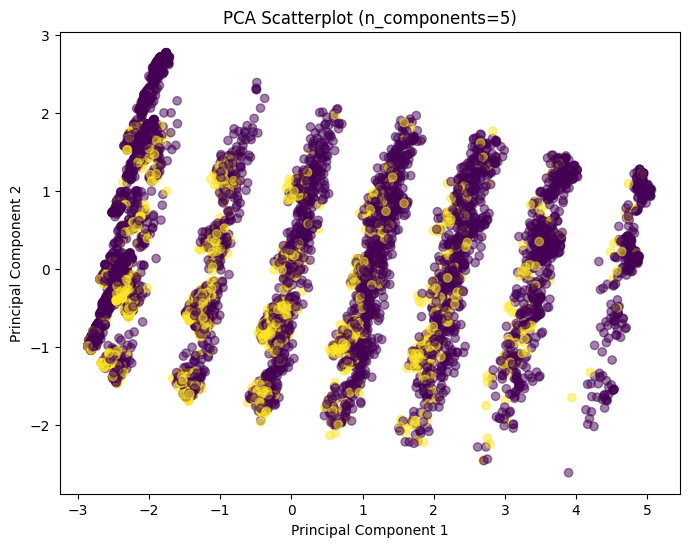

In [31]:
def plot_pca_scatter(df, num_features, n_components=5):
    # Define X and y
    y = df['Churn']
    X_cat = df.drop(columns=['Churn'] + num_features)  # Drop both 'Churn' and numerical features
    X_num = df[num_features]

    scaler = MinMaxScaler()
    X_num_scaled = scaler.fit_transform(X_num)
    X_num_scaled = pd.DataFrame(X_num_scaled, columns=num_features)

    X = pd.concat([X_cat, X_num_scaled], axis=1)

    pca = PCA(n_components=n_components)

    # Fit PCA to the scaled data and transform it into the specified number of components
    X_pca = pca.fit_transform(X)

    # Create a scatterplot of the PCA components
    plt.figure(figsize=(8, 6))
    if n_components == 5:
        plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis', alpha=0.5)
        plt.xlabel('Principal Component 1')
        plt.ylabel('Principal Component 2')


    plt.title(f'PCA Scatterplot (n_components={n_components})')
    plt.show()

# Perform PCA and plot the scatterplot with 2 components
plot_pca_scatter(df, num_features, n_components=5)


### Comparing Classification Models
Comparing the performance of various classification models on the training dataset and displaying mean accuracy and confusion matrix.

#### Accuracy of the models before applying normalization and PCA

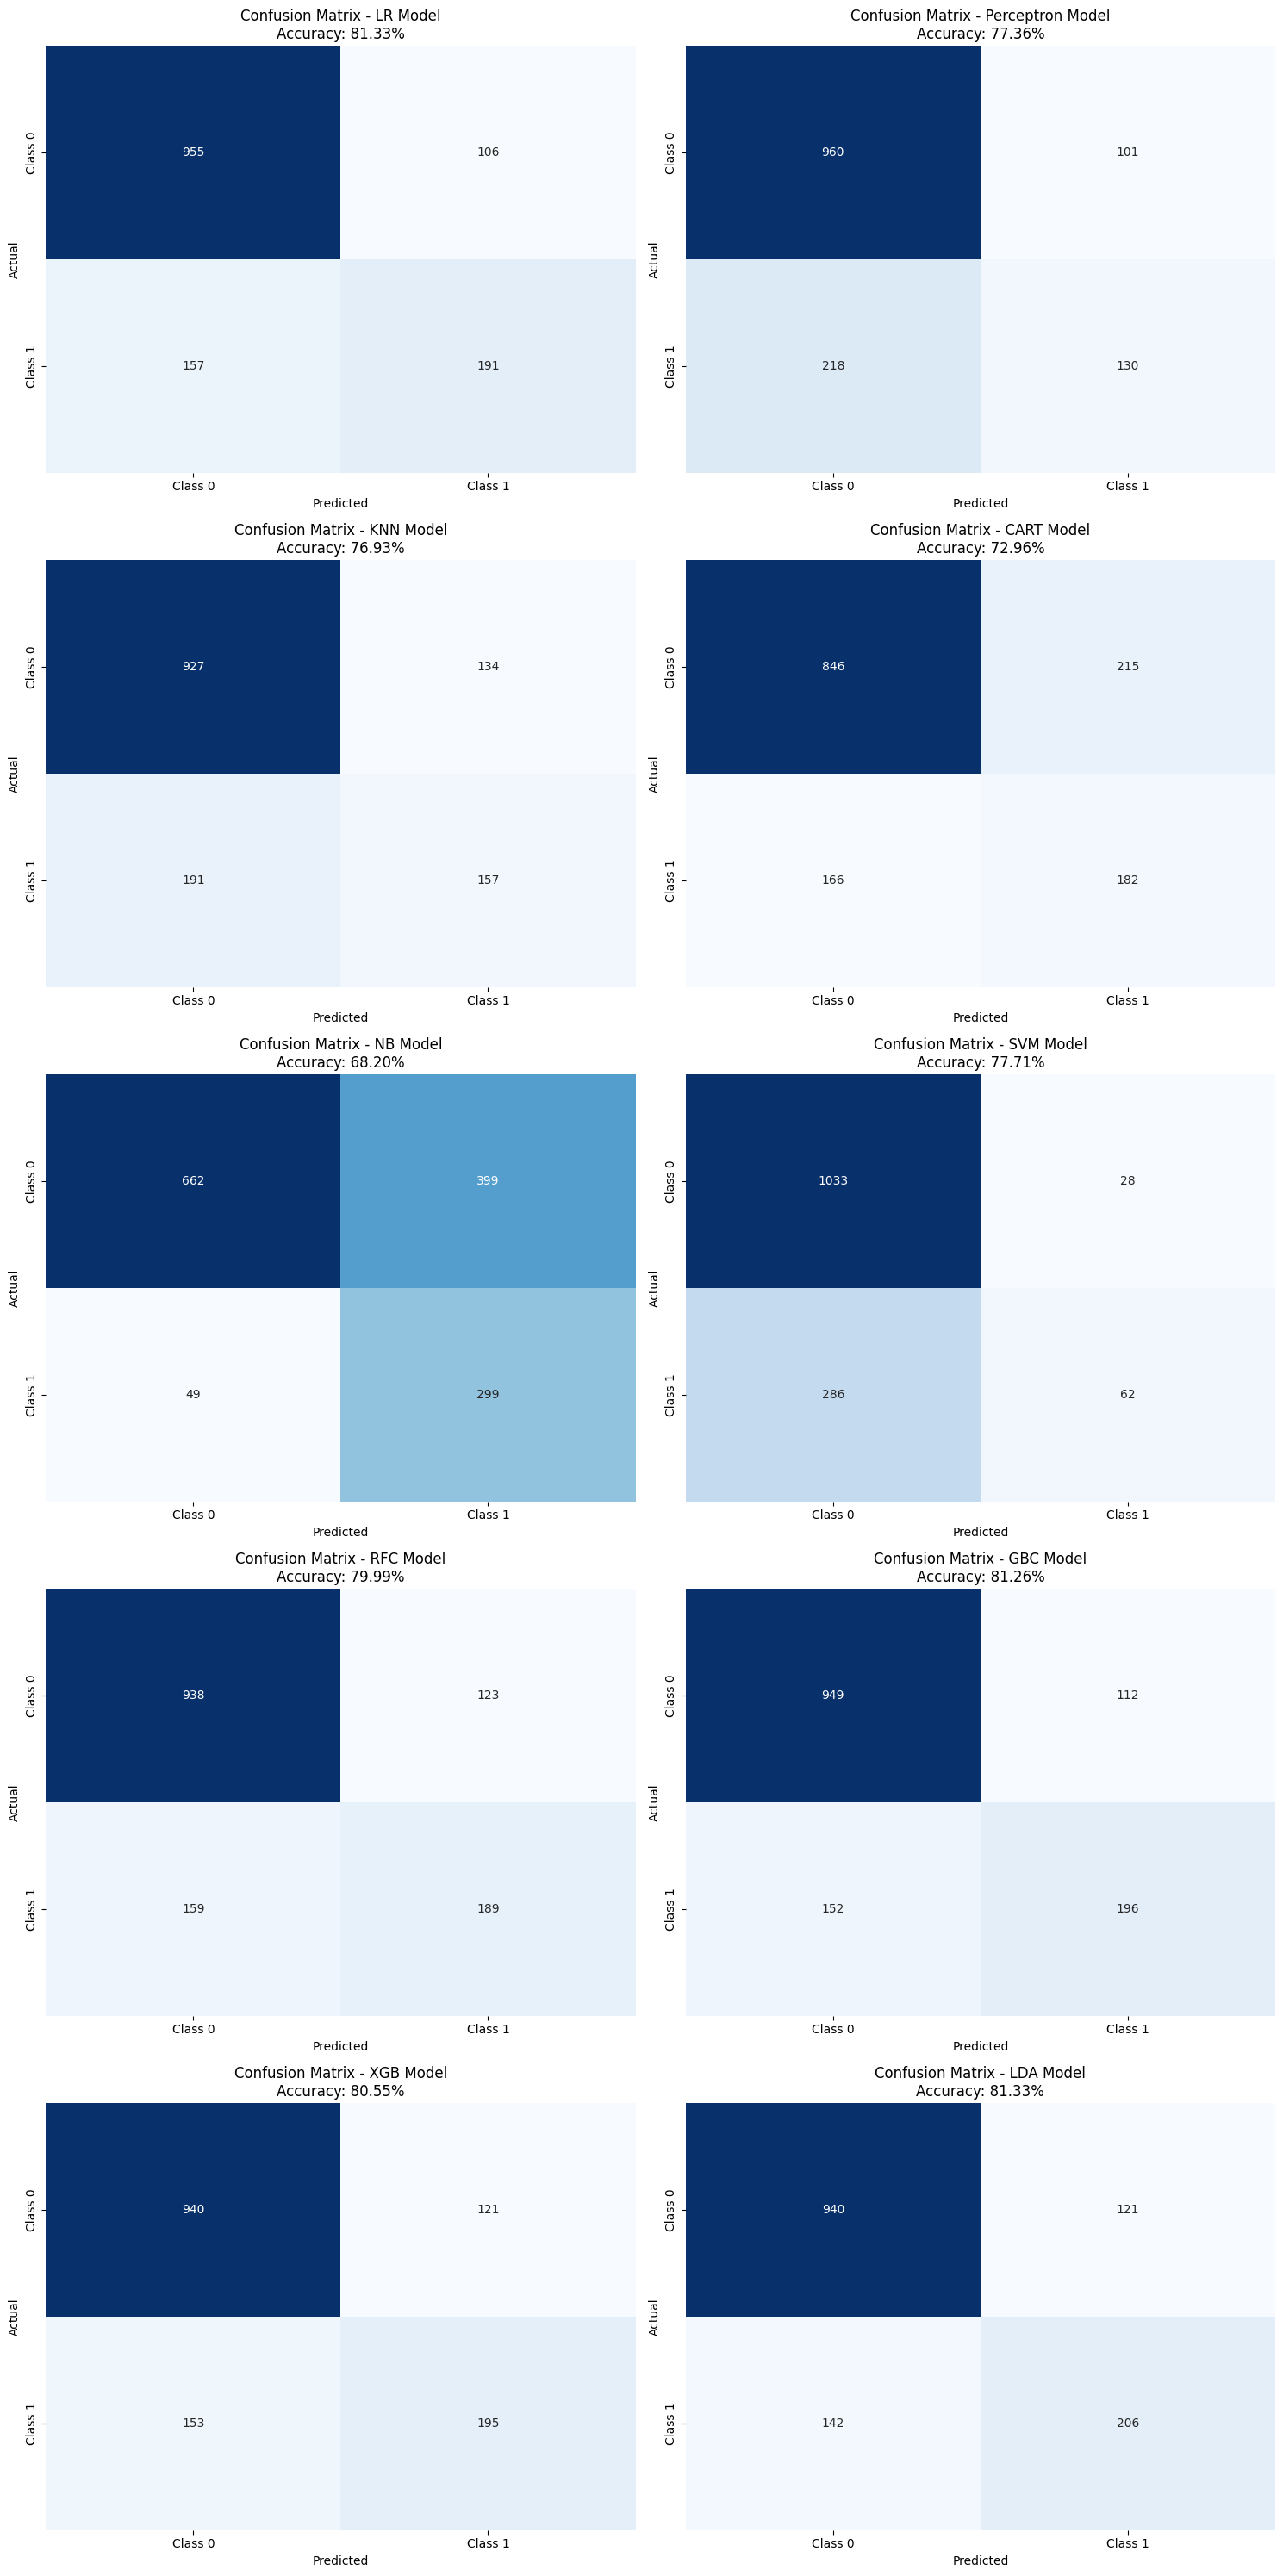

[('LR', 81.33427963094393),
 ('Perceptron', 77.35982966643009),
 ('KNN', 76.93399574166075),
 ('CART', 72.95954577714691),
 ('NB', 68.20440028388929),
 ('SVM', 77.71469127040454),
 ('RFC', 79.98580553584102),
 ('GBC', 81.26330731014905),
 ('XGB', 80.55358410220013),
 ('LDA', 81.33427963094393)]

In [32]:
def evaluate_models_with_confusion_matrices(X, y, models):
    accuracies = []  # List to store accuracies for each model

    # Split the dataset
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

    # Create subplots for confusion matrix plots
    num_models = len(models)
    num_cols = 2  # Number of columns in the subplot grid
    num_rows = (num_models + 1) // num_cols  # Calculate the number of rows

    # Set up the subplots
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 6 * num_rows))
    axes = axes.ravel()

    # Evaluate each model and generate confusion matrix plots
    for i, (name, model) in enumerate(models):
        model.fit(X_train, y_train)
        predictions = model.predict(X_test)

        accuracy = accuracy_score(y_test, predictions) * 100
        accuracies.append((name, accuracy))  # Store accuracy for this model
        
        # Confusion matrix
        cm = confusion_matrix(y_test, predictions)

        # Plot confusion matrix
        sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False, ax=axes[i])
        axes[i].set_xlabel("Predicted")
        axes[i].set_ylabel("Actual")
        axes[i].set_title(f"Confusion Matrix - {name} Model\nAccuracy: {accuracy:.2f}%")
        axes[i].set_xticks([0.5, 1.5])
        axes[i].set_yticks([0.5, 1.5])
        axes[i].set_xticklabels(["Class 0", "Class 1"])
        axes[i].set_yticklabels(["Class 0", "Class 1"])

    # Adjust spacing between subplots
    plt.tight_layout()
    plt.show()
    return accuracies

# Define models
models = []
models.append(('LR', LogisticRegression(C=0.01, solver='liblinear')))
models.append(('Perceptron', Perceptron()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))
models.append(('RFC', RandomForestClassifier()))
models.append(('GBC', GradientBoostingClassifier()))
models.append(('XGB', XGBClassifier()))
models.append(('LDA', LDA()))

X_before_pca = df.drop(columns='Churn').to_numpy()
y = df['Churn'].to_numpy()

evaluate_models_with_confusion_matrices(X_before_pca, y, models)



#### Accuracy of the models after applying normalization and PCA

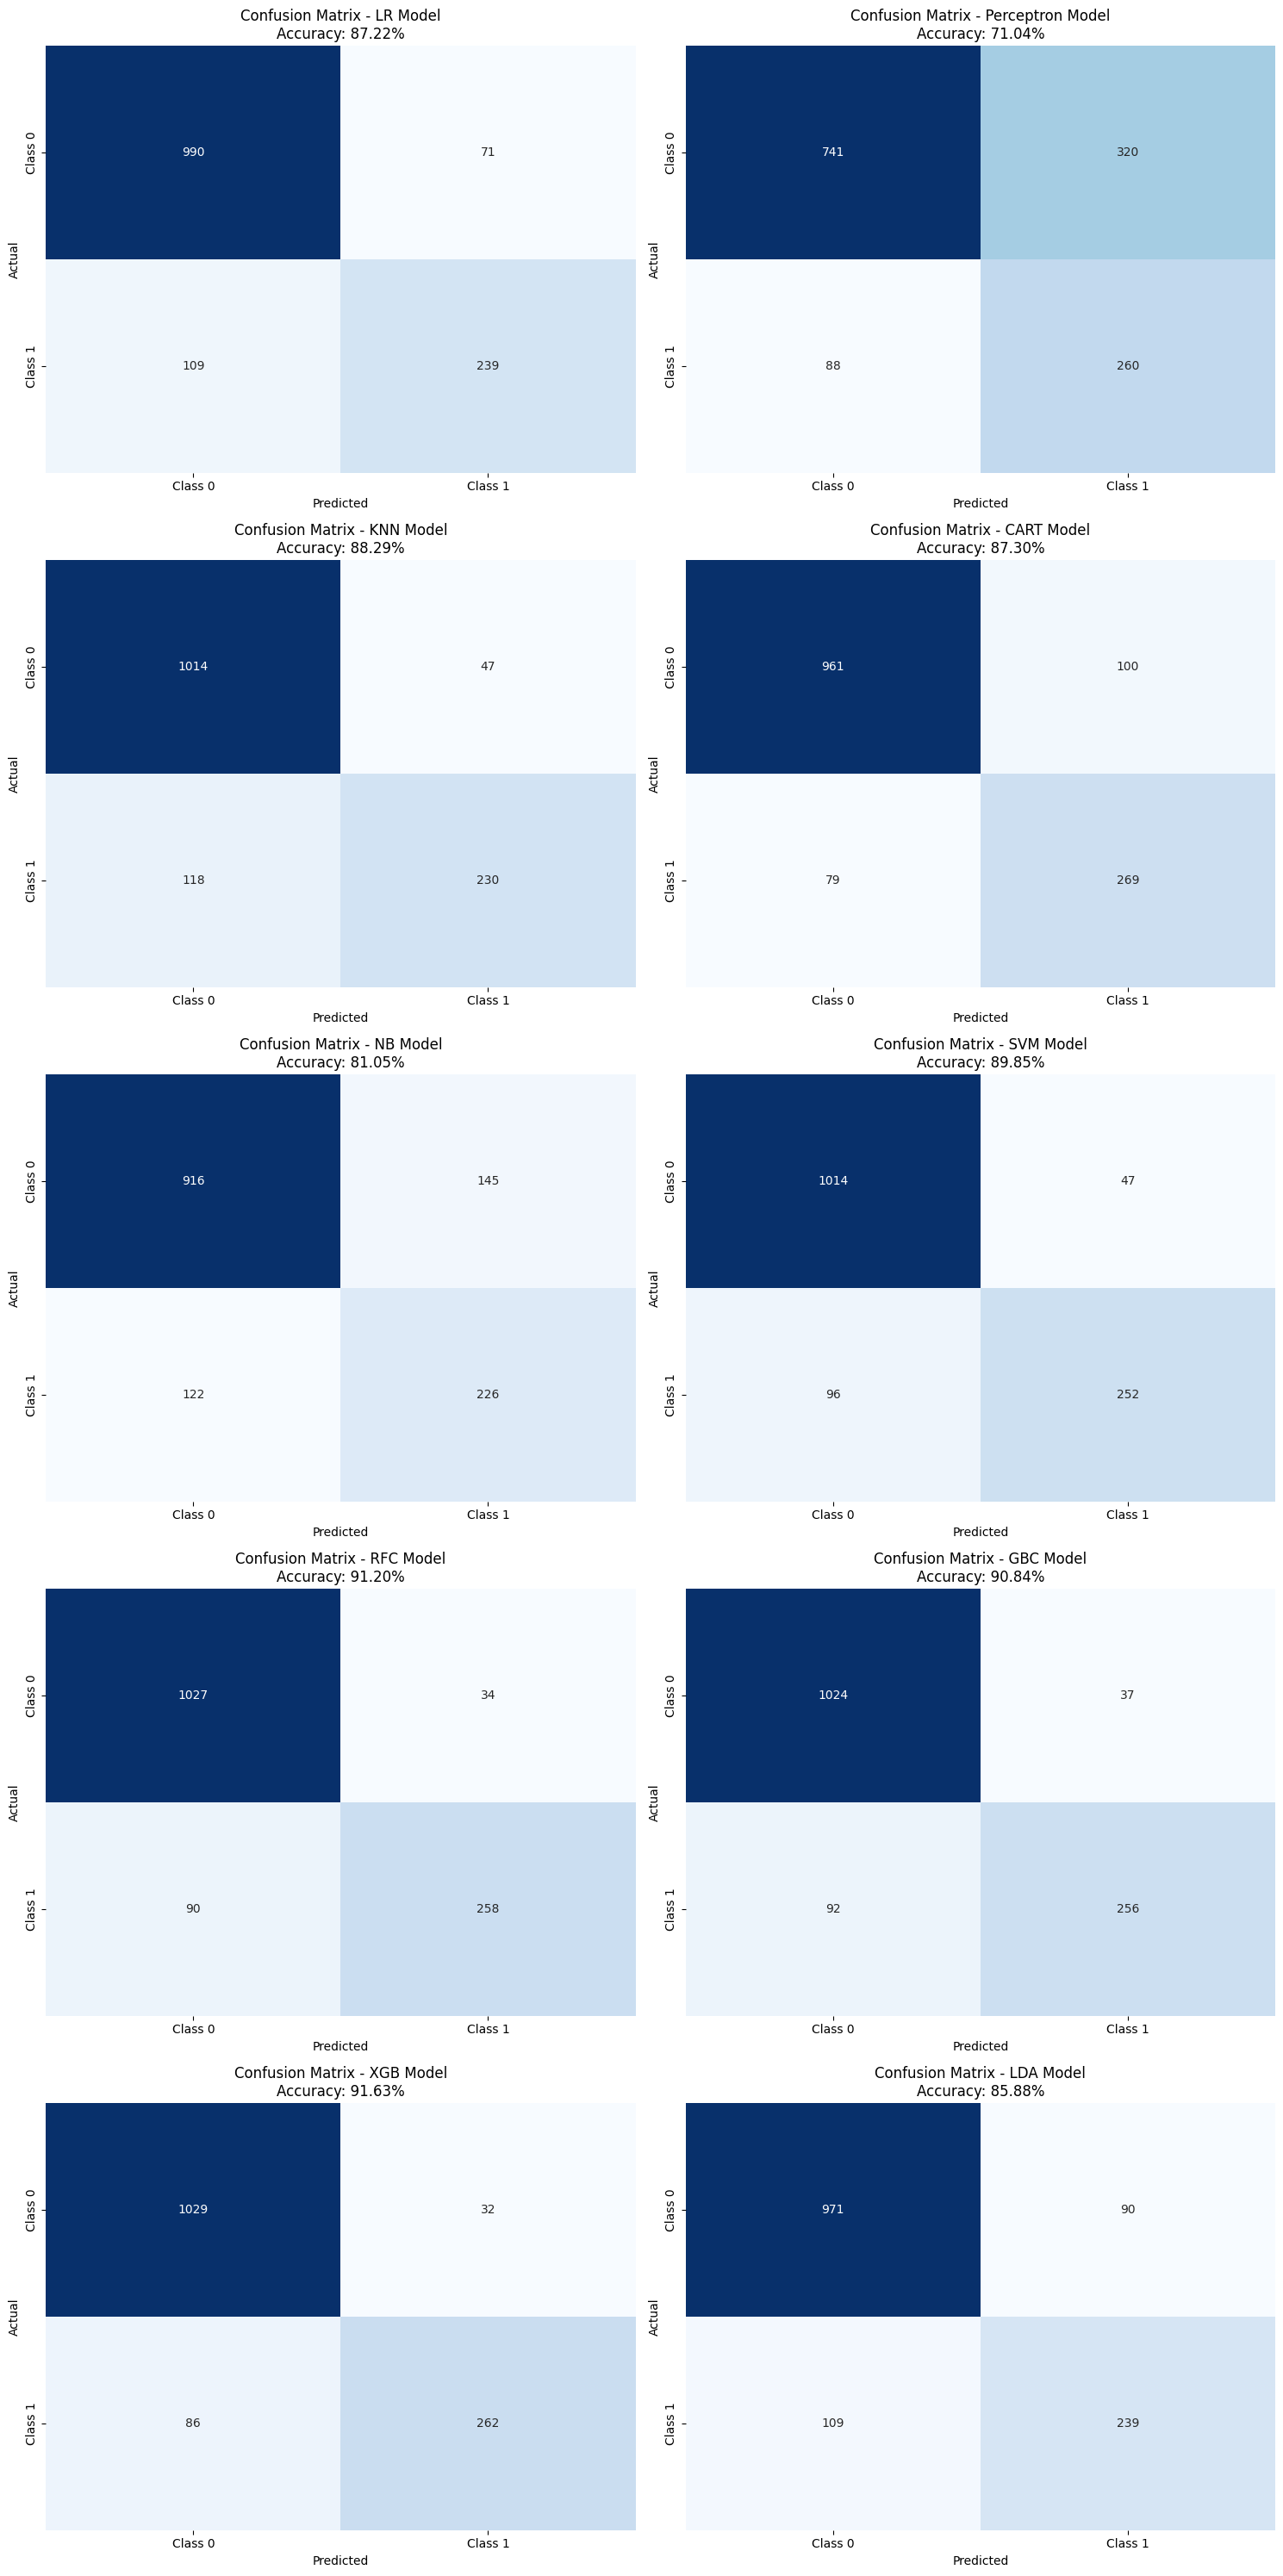

[('LR', 87.2249822569198),
 ('Perceptron', 71.04329311568488),
 ('KNN', 88.28956706884316),
 ('CART', 87.2959545777147),
 ('NB', 81.05039034776436),
 ('SVM', 89.85095812633072),
 ('RFC', 91.19943222143364),
 ('GBC', 90.84457061745918),
 ('XGB', 91.62526614620297),
 ('LDA', 85.87650816181689)]

In [34]:
# Define the list of numerical features to use for PCA
num_features = ['Tenure', 'MonthlyCharges', 'TotalCharges', 'MonthlyToTotalChargesRatio', 'TotalPayment', 'NEW_AVG_Charges', "NEW_Increase", 'NEW_AVG_Service_Fee']

y = df['Churn']
X_cat = df.drop(columns='Churn')
X_cat = df.drop(columns=num_features)
X_num = df[num_features]


# Create a MaxAbsScaler instance
scaler = MaxAbsScaler()
X_num_scaled = scaler.fit_transform(X_num)
X_num_scaled = pd.DataFrame(X_num_scaled, columns=num_features)

X = pd.concat([X_cat, X_num_scaled], axis=1)

n_components = 5
pca = PCA(n_components=n_components)

X_pca = pca.fit_transform(X)

# Evaluate models with confusion matrices
evaluate_models_with_confusion_matrices(X_pca, y, models)


### Deep Learning: Neural Network

In [45]:
import tensorflow as tf
from tensorflow import keras

def train_neural_network(X_num, X_cat, y, num_features, X_pca, num_epochs=20, batch_size=32, validation_split=0.2):
    # Determine the number of features based on your dataset
    num_features = X_pca.shape[1]

    # Define the architecture of the neural network with additional hidden layers
    model = keras.Sequential([
        keras.layers.Input(shape=(num_features,)),  # Input layer
        keras.layers.Dense(128, activation='relu'),  # Hidden layer with ReLU activation
        keras.layers.Dense(64, activation='relu'),   # Additional hidden layer with ReLU activation
        keras.layers.Dense(32, activation='relu'),   # Additional hidden layer with ReLU activation
        keras.layers.Dense(16, activation='relu'),   # Additional hidden layer with ReLU activation
        keras.layers.Dense(1, activation='sigmoid')  # Output layer with sigmoid activation for binary classification
    ])

    # Compile the model
    model.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=1)

    # Train the model
    model.fit(X_train, y_train, epochs=num_epochs, batch_size=batch_size, validation_split=validation_split)

    # Evaluate the model on the test data
    test_loss, test_acc = model.evaluate(X_test, y_test)
    print(f'Test accuracy: {test_acc * 100:.2f}%')

    return model, test_acc

num_features = ['Tenure', 'MonthlyCharges', 'TotalCharges', 'MonthlyToTotalChargesRatio', 'TotalPayment', 'NEW_AVG_Charges', "NEW_Increase", 'NEW_AVG_Service_Fee']

y = df['Churn']
X_cat = df.drop(columns='Churn')
X_cat = df.drop(columns=num_features)
X_num = df[num_features]


scaler = MaxAbsScaler()

X_num_scaled = scaler.fit_transform(X_num)
X_num_scaled = pd.DataFrame(X_num_scaled, columns=num_features)

X = pd.concat([X_cat, X_num_scaled], axis=1)

pca = PCA(n_components = 5)
X_pca = pca.fit_transform(X)

model_nn, test_accuracy = train_neural_network(X_num, X_cat, y, num_features, X_pca)
test_accuracy

Epoch 1/20
141/141 [==============================] - 1s 3ms/step - loss: 0.4295 - accuracy: 0.8005 - val_loss: 0.3936 - val_accuracy: 0.8012
Epoch 2/20
141/141 [==============================] - 0s 2ms/step - loss: 0.3498 - accuracy: 0.8445 - val_loss: 0.3702 - val_accuracy: 0.8367
Epoch 3/20
141/141 [==============================] - 0s 2ms/step - loss: 0.3296 - accuracy: 0.8580 - val_loss: 0.3491 - val_accuracy: 0.8492
Epoch 4/20
141/141 [==============================] - 0s 2ms/step - loss: 0.3134 - accuracy: 0.8700 - val_loss: 0.3345 - val_accuracy: 0.8580
Epoch 5/20
141/141 [==============================] - 0s 2ms/step - loss: 0.3030 - accuracy: 0.8711 - val_loss: 0.3306 - val_accuracy: 0.8554
Epoch 6/20
141/141 [==============================] - 0s 2ms/step - loss: 0.2994 - accuracy: 0.8729 - val_loss: 0.3328 - val_accuracy: 0.8580
Epoch 7/20
141/141 [==============================] - 0s 2ms/step - loss: 0.2928 - accuracy: 0.8780 - val_loss: 0.3230 - val_accuracy: 0.8642
Epoch 

0.9176720976829529

### Random Forest Classifier Model Evaluation and Confusion Matrix
After determining that the Random Forest Classifier model has the highest accuracy, we implement the following:

Training a Random Forest Classifier model, making predictions on the test set, calculating accuracy, generating a classification report, and visualizing the confusion matrix.

In [36]:
# # Create a RandomForest model
# rf_classifier = RandomForestClassifier()

# # Define the hyperparameter grid for RandomForest
# param_grid = {
#     'n_estimators': [100, 200, 300, 400],  # Number of trees in the forest
#     'max_features': ['auto', 'sqrt', 'log2'],  # Number of features to consider when looking for the best split
#     'max_depth': [10, 20, 30, 40, 50, None],  # Maximum depth of the tree
#     'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
#     'min_samples_leaf': [1, 2, 4],  # Minimum number of samples required to be at a leaf node
#     'bootstrap': [True, False]  # Whether bootstrap samples are used when building trees
# }

# # Use RandomizedSearchCV for hyperparameter tuning
# random_search = RandomizedSearchCV(
#     rf_classifier, param_distributions=param_grid, n_iter=100, scoring='accuracy', cv=5, random_state=1)

# # Fit the randomized search to your data
# random_search.fit(X_train, y_train)

# # Get the best hyperparameters
# best_params = random_search.best_params_
# print("Best Hyperparameters:", best_params)

# # Use the best model for predictions
# best_rf_model = random_search.best_estimator_
# predictions = best_rf_model.predict(X_test)

# # Evaluate the best model
# accuracy = accuracy_score(y_test, predictions)
# print(f'Accuracy: {accuracy * 100:.2f}%')

# Best Hyperparameters: {'n_estimators': 300, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 30, 'bootstrap': False}
# Accuracy: 89.85%

**Please note that this part is commented because it takes too long to implement**

In [48]:
num_features = ['Tenure', 'MonthlyCharges', 'TotalCharges', 'MonthlyToTotalChargesRatio', 'TotalPayment', 'NEW_AVG_Charges', "NEW_Increase", 'NEW_AVG_Service_Fee']

y = df['Churn']
X_cat = df.drop(columns='Churn')
X_cat = df.drop(columns=num_features)
X_num = df[num_features]

scaler = MinMaxScaler()
X_num_scaled = scaler.fit_transform(X_num)
X_num_scaled = pd.DataFrame(X_num_scaled, columns=num_features)

X = pd.concat([X_cat, X_num_scaled], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=3)

w_train = compute_sample_weight('balanced', y_train)

pca = PCA(n_components = 5)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

model1 = RandomForestClassifier(n_estimators= 300, min_samples_split= 2, min_samples_leaf= 1, max_features= 'sqrt', max_depth= 30, bootstrap= False)
model1.fit(X_train_pca, y_train, sample_weight=w_train)
predictions = model1.predict(X_test_pca)
print('Accuracy: %.2f%%' % (accuracy_score(y_test, predictions) * 100))
print(classification_report(y_test, predictions))


Accuracy: 90.53%
              precision    recall  f1-score   support

           0       0.91      0.96      0.94      1568
           1       0.87      0.74      0.80       545

    accuracy                           0.91      2113
   macro avg       0.89      0.85      0.87      2113
weighted avg       0.90      0.91      0.90      2113



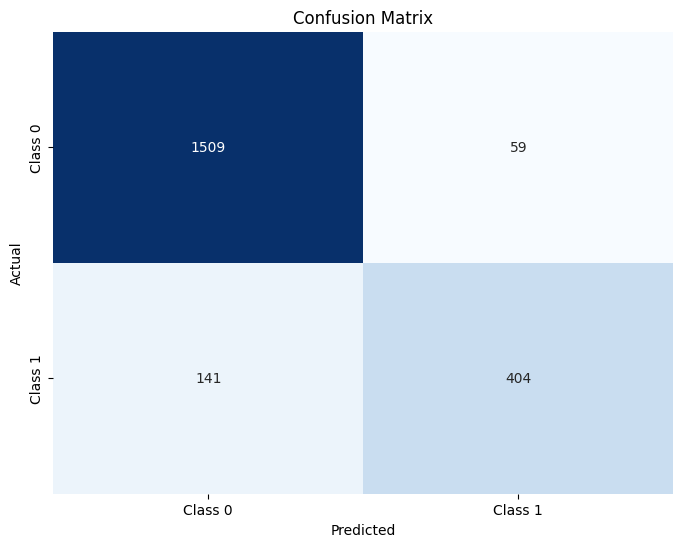

In [49]:
cm = confusion_matrix(y_test, predictions)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.xticks([0.5, 1.5], ["Class 0", "Class 1"])
plt.yticks([0.5, 1.5], ["Class 0", "Class 1"])
plt.show()

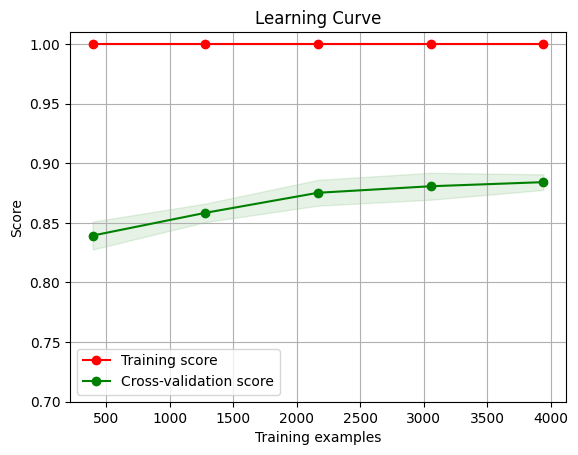

In [50]:
# Define a function to plot the learning curve
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None, n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes, scoring='accuracy')
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

# Create and train the RandomForestClassifier model
model2 = RandomForestClassifier(n_estimators=300, min_samples_split=2, min_samples_leaf=1,
                               max_features='sqrt', max_depth=30, bootstrap=True)
model2.fit(X_train_pca, y_train)

# Example usage:
plot_learning_curve(model2, "Learning Curve", X_train_pca, y_train, ylim=(0.7, 1.01), cv=5, n_jobs=-1)

# Show the plot
plt.show()


In [51]:
import pickle

file = 'final_assignment.sav'
pickle.dump(model1, open(file, 'wb'))

In [52]:
model_json = model_nn.to_json()

with open('model_nn.json', 'w') as json_file:
    json_file.write(model_json)

model_nn.save_weights('model_nn.h5')